In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
data = pd.read_csv('/home/binit/HistoryOfNepal/Amusement_Park_ABC_Data.xlsx - Amusement_Park_Data.csv')
data.head(10)

,Date,Visitor_ID,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,4/11/2022,V100000,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6,NaN,NaN,NaN
1,26/2/2023,V100001,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7,NaN,NaN,NaN
2,23/6/2020,V100002,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3,NaN,NaN,NaN
3,21/5/2022,V100003,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4,NaN,NaN,NaN
4,4/6/2023,V100004,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7,NaN,NaN,NaN
5,17/2/2022,V100005,Domestic,22,Male,Nepal,Regular,1500,6,Water Slides,Yes,12,11:52,18:46,3.9,2.7,5.0,NaN,NaN,NaN
6,3/11/2023,V100006,Domestic,20,Male,Singapore,Fast Track,3000,6,Ferris Wheels,No,5,13:56,14:09,3.9,3.1,4.4,NaN,NaN,NaN
7,10/9/2018,V100007,Local,33,Female,China,Fast Track,2000,2,Ferris Wheels,No,10,13:19,17:35,4.3,2.5,3.6,NaN,NaN,NaN
8,4/4/2018,V100008,Domestic,29,Male,China,Fast Track,2000,6,Water Slides,No,10,12:07,15:25,4.5,2.6,5.0,NaN,NaN,NaN
9,5/6/2018,V100009,Local,31,Female,Singapore,Regular,1200,4,Roller Coasters,No,6,10:02,15:40,4.5,3.0,3.1,NaN,NaN,NaN


In [14]:
data.columns

Index(['Date', 'Visitor_ID', 'Geographic_Origin', 'Age', 'Gender', 'Location',
       'Ticket Type', 'Ticket Price per Visitor', 'No of Visitors',
       'Type_of_Ride_Preferred', 'Accompanied_by_Children',
       'Number_of_Rides_Played', 'Check_In_Time', 'Check_Out_Time',
       'Visitor_Satisfaction', 'Ride_Quality_Rating', 'Cleanliness_Rating',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [15]:
data.isnull().sum()

Date                            0
Visitor_ID                      0
Geographic_Origin               0
Age                             0
Gender                          0
Location                        0
Ticket Type                     0
Ticket Price per Visitor        0
No of Visitors                  0
Type_of_Ride_Preferred          0
Accompanied_by_Children         0
Number_of_Rides_Played          0
Check_In_Time                   0
Check_Out_Time                  0
Visitor_Satisfaction            0
Ride_Quality_Rating             0
Cleanliness_Rating              0
Unnamed: 17                 70523
Unnamed: 18                 70522
Unnamed: 19                 70522
dtype: int64

In [16]:
data = data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Visitor_ID'])
data

,Date,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating
0,4/11/2022,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6
1,26/2/2023,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7
2,23/6/2020,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3
3,21/5/2022,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4
4,4/6/2023,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70518,23/8/2023,Local,27,female,Singapore,Regular,1800,4,Ferris Wheels,No,9,11:45,18:28,2.8,2.8,3.1
70519,13/1/2020,Local,22,male,Nepal,Fast Track,1500,4,Bumper Cars,Yes,7,13:12,17:16,2.9,4.4,4.2
70520,26/8/2023,Local,24,female,Nepal,Regular,1500,2,Roller Coasters,Yes,9,11:02,18:00,2.5,3.3,4.3
70521,11/6/2020,Local,25,male,Nepal,Fast Track,1500,2,Water Slides,Yes,8,10:19,16:19,2.8,2.7,2.1


#key takeaways 
Ages with Higher Visitors:

Ages 22 to 28 appear to have the highest number of visitors across all rides.
These bars are taller, showing that more visitors fall in this age range.
Most Popular Ride Types:

The larger contributions from Water Slides (green) and Drop Towers (purple) suggest these rides are consistently preferred across ages.
Age-Specific Insights:

Ages 18–22 show a relatively high frequency for certain rides like Roller Coasters (yellow) and Bumper Cars (red).
Ages 30+ have a noticeable drop in participation across all rides, which could suggest less interest from older age groups.


In [18]:
#Lowest satisfaction

location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
lowest_satisfaction_location = location_satisfaction.loc[location_satisfaction['Visitor_Satisfaction'].idxmin()]
print("Location with the lowest customer satisfaction:")
print(f"Location: {lowest_satisfaction_location['Location']}")
print(f"Average Satisfaction Score: {lowest_satisfaction_location['Visitor_Satisfaction']}")

#highest satisfaction
location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
location_satisfaction = location_satisfaction.sort_values(by='Visitor_Satisfaction', ascending=False)
highest_satisfaction_location = location_satisfaction.head(1)

print("Location with the highest customer satisfaction:")
print(f"Location: {highest_satisfaction_location['Location'].values[0]}")
print(f"Average Satisfaction Score: {highest_satisfaction_location['Visitor_Satisfaction'].values[0]}")

Location with the lowest customer satisfaction:
Location: Singapore
Average Satisfaction Score: 3.855234305549676
Location with the highest customer satisfaction:
Location: Nepal
Average Satisfaction Score: 3.8604930924548357


In [19]:
location_ride_quality = data.groupby('Location')['Ride_Quality_Rating'].mean().reset_index()
location_ride_quality = location_ride_quality.sort_values(by='Ride_Quality_Rating', ascending=False)
highest_ride_quality = location_ride_quality.head(1)
lowest_ride_quality = location_ride_quality.tail(1)
print("Location with the highest ride quality:")
print(f"Location: {highest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {highest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")

print("\nLocation with the lowest ride quality:")
print(f"Location: {lowest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {lowest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")


Location with the highest ride quality:
Location: Singapore
Average Ride Quality Rating: 3.50

Location with the lowest ride quality:
Location: China
Average Ride Quality Rating: 3.49


In [20]:
#cleanliness 
location_cleanliness = data.groupby('Location')['Cleanliness_Rating'].mean().reset_index()
location_cleanliness = location_cleanliness.sort_values(by='Cleanliness_Rating', ascending=False)
highest_cleanliness = location_cleanliness.head(1)
lowest_cleanliness = location_cleanliness.tail(1)
print("Location with the highest cleanliness rating:")
print(f"Location: {highest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {highest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

print("\nLocation with the lowest cleanliness rating:")
print(f"Location: {lowest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {lowest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

Location with the highest cleanliness rating:
Location: China
Average Cleanliness Rating: 3.86

Location with the lowest cleanliness rating:
Location: Nepal
Average Cleanliness Rating: 3.85


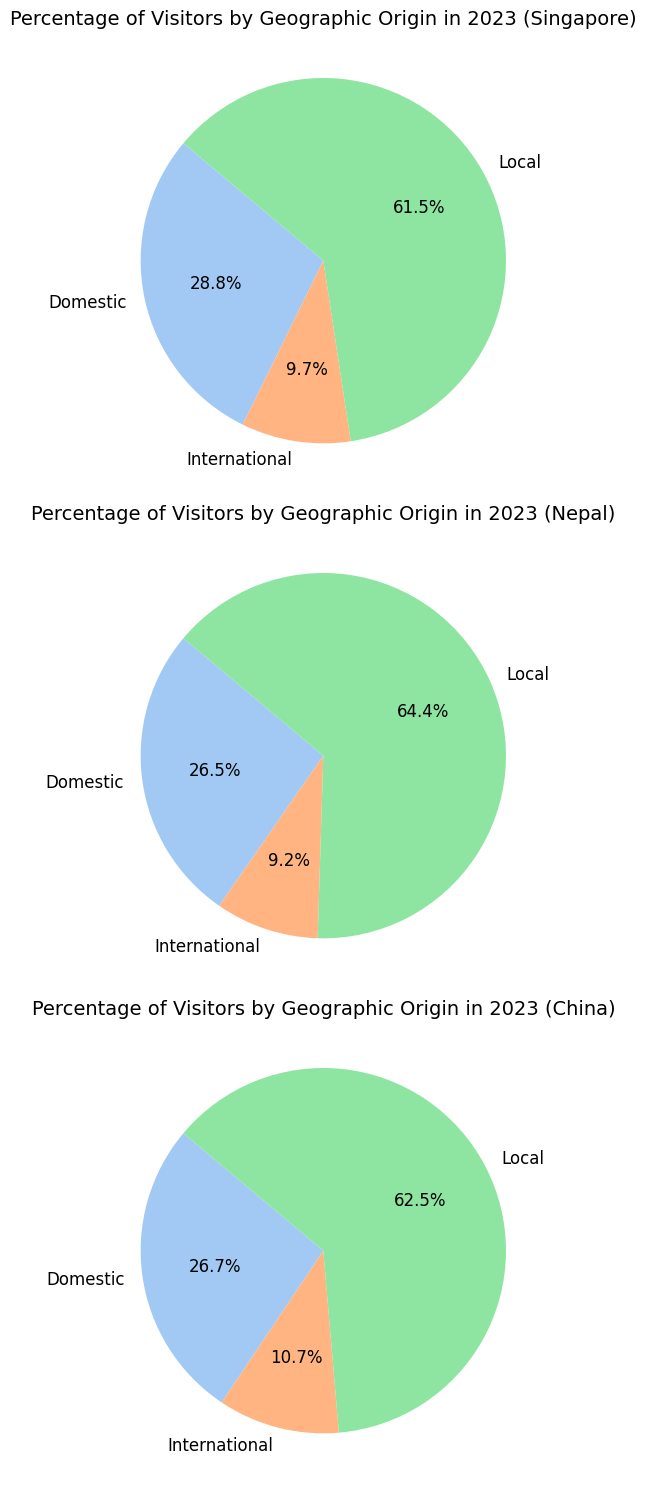

In [26]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate total visitors by geographic origin for 2023
geo_visitors_2023 = data_2023.groupby('Geographic_Origin').size().reset_index(name='Visitor_Count')

# Sort geographic origins by visitor count in descending order
geo_visitors_2023 = geo_visitors_2023.sort_values('Visitor_Count', ascending=False)

# Visualize geographic origin data for each location in 2023 using pie charts
locations = data_2023['Location'].unique()
plt.figure(figsize=(15, 15))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = data_2023[data_2023['Location'] == location]
    geo_location_visitors = location_data.groupby('Geographic_Origin').size().reset_index(name='Visitor_Count')
    plt.pie(
        geo_location_visitors['Visitor_Count'], 
        labels=geo_location_visitors['Geographic_Origin'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel', len(geo_location_visitors)),
        textprops={'fontsize': 12}
    )
    plt.title(f'Percentage of Visitors by Geographic Origin in 2023 ({location})', fontsize=14)

plt.tight_layout()
plt.show()

In [34]:
# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate data to include total, local, domestic, and international visitors by location
visitor_details = data.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')

# Calculate totals for each location
visitor_summary = visitor_details.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary['Total_Visitors'] = visitor_summary.sum(axis=1)

# Reset index for better readability
visitor_summary = visitor_summary.reset_index()

# Rank locations based on total visitors in descending order
visitor_summary = visitor_summary.sort_values(by='Total_Visitors', ascending=False).reset_index(drop=True)

visitor_summary


Geographic_Origin,Location,Domestic,International,Local,Total_Visitors
0,Singapore,5022,1651,16950,23623
1,Nepal,5130,1634,16761,23525
2,China,4896,1701,16778,23375


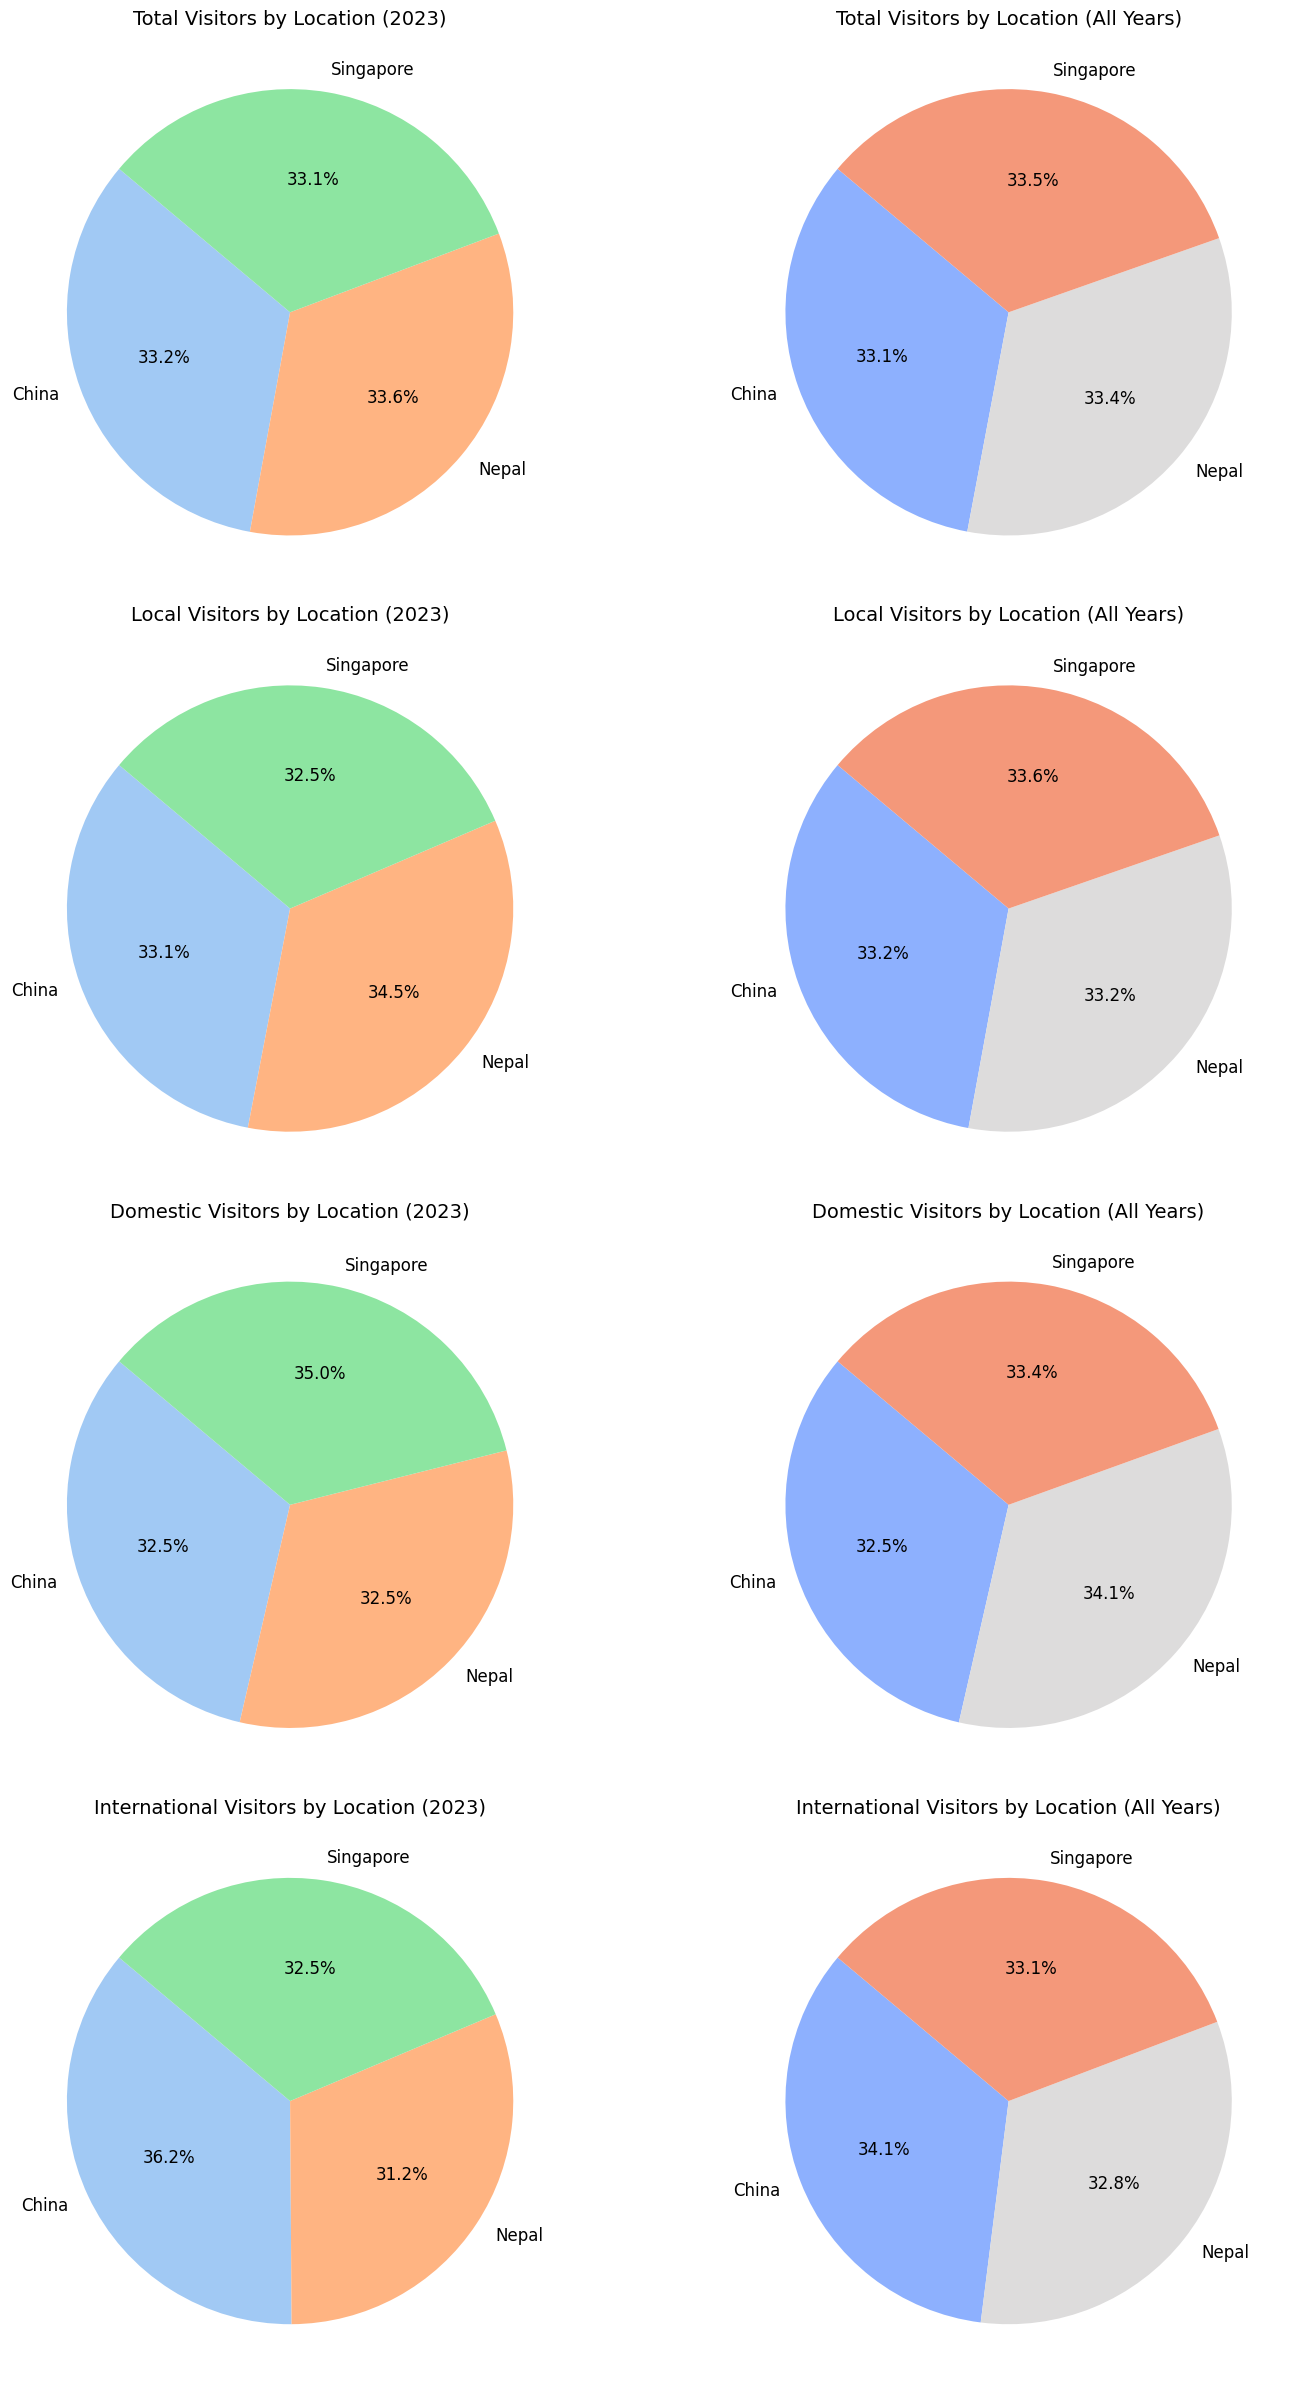

(Geographic_Origin   Location  Domestic  International  Local  Total_Visitors
 0                      China       562            226   1315            2103
 1                      Nepal       563            195   1370            2128
 2                  Singapore       605            203   1290            2098,
 Geographic_Origin   Location  Domestic  International  Local  Total_Visitors
 0                      China      4896           1701  16778           23375
 1                      Nepal      5130           1634  16761           23525
 2                  Singapore      5022           1651  16950           23623)

In [39]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Aggregate data to include total, local, domestic, and international visitors by location
visitor_details = data.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')

# Calculate totals for each location for all years
visitor_summary_all_years = visitor_details.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary_all_years['Total_Visitors'] = visitor_summary_all_years.sum(axis=1)
visitor_summary_all_years = visitor_summary_all_years.reset_index()

# Calculate totals for each location for 2023
visitor_details_2023 = data_2023.groupby(['Location', 'Geographic_Origin']).size().reset_index(name='Visitor_Count')
visitor_summary_2023 = visitor_details_2023.pivot(index='Location', columns='Geographic_Origin', values='Visitor_Count').fillna(0)
visitor_summary_2023['Total_Visitors'] = visitor_summary_2023.sum(axis=1)
visitor_summary_2023 = visitor_summary_2023.reset_index()

# Create pie charts for total visitors, local, domestic, and international for 2023 and all years
fig, axes = plt.subplots(4, 2, figsize=(16, 24))

# Total Visitors
axes[0, 0].pie(
    visitor_summary_2023['Total_Visitors'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[0, 0].set_title('Total Visitors by Location (2023)', fontsize=14)

axes[0, 1].pie(
    visitor_summary_all_years['Total_Visitors'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[0, 1].set_title('Total Visitors by Location (All Years)', fontsize=14)

# Local Visitors
axes[1, 0].pie(
    visitor_summary_2023['Local'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[1, 0].set_title('Local Visitors by Location (2023)', fontsize=14)

axes[1, 1].pie(
    visitor_summary_all_years['Local'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[1, 1].set_title('Local Visitors by Location (All Years)', fontsize=14)

# Domestic Visitors
axes[2, 0].pie(
    visitor_summary_2023['Domestic'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[2, 0].set_title('Domestic Visitors by Location (2023)', fontsize=14)

axes[2, 1].pie(
    visitor_summary_all_years['Domestic'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[2, 1].set_title('Domestic Visitors by Location (All Years)', fontsize=14)

# International Visitors
axes[3, 0].pie(
    visitor_summary_2023['International'], 
    labels=visitor_summary_2023['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel', len(visitor_summary_2023)),
    textprops={'fontsize': 12}
)
axes[3, 0].set_title('International Visitors by Location (2023)', fontsize=14)

axes[3, 1].pie(
    visitor_summary_all_years['International'], 
    labels=visitor_summary_all_years['Location'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(visitor_summary_all_years)),
    textprops={'fontsize': 12}
)
axes[3, 1].set_title('International Visitors by Location (All Years)', fontsize=14)

plt.tight_layout()
plt.show()

visitor_summary_2023, visitor_summary_all_years


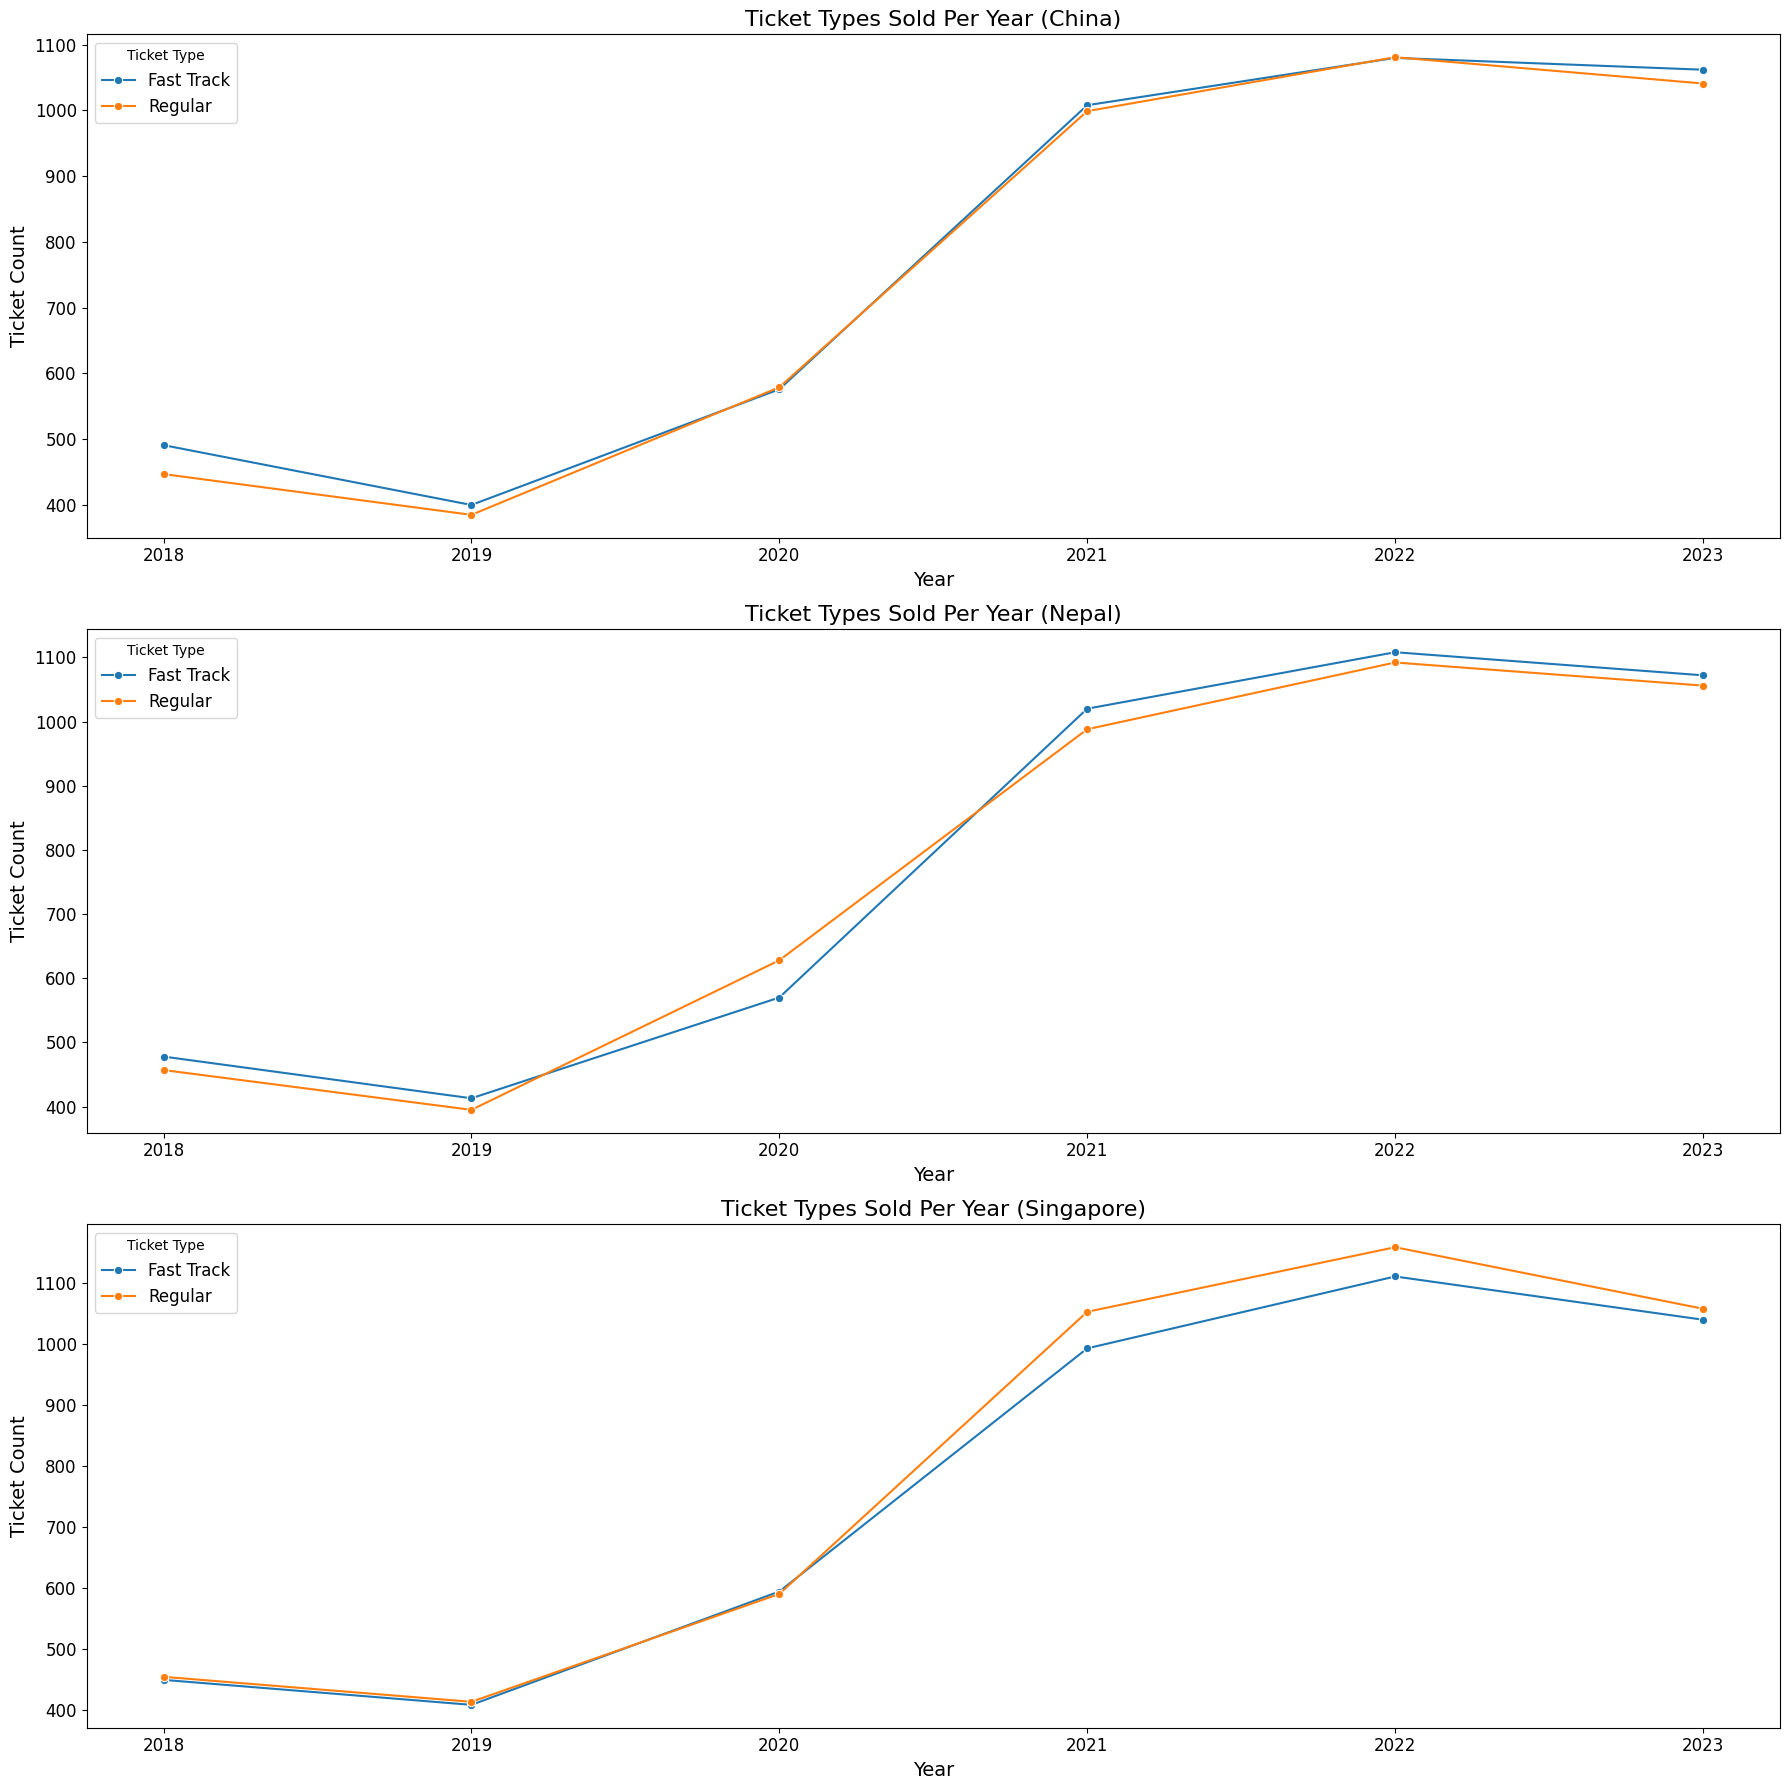

In [26]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate ticket type data by year and location
ticket_summary = data.groupby(['Year', 'Location', 'Ticket Type']).size().reset_index(name='Ticket_Count')

# Get unique locations for creating separate visualizations
locations = data['Location'].unique()

# Create separate line graph visualizations for each location
plt.figure(figsize=(18, 18))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = ticket_summary[ticket_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Ticket_Count', 
        hue='Ticket Type', 
        marker='o'
    )
    plt.title(f'Ticket Types Sold Per Year ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Ticket Count', fontsize=14)
    plt.legend(title='Ticket Type', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


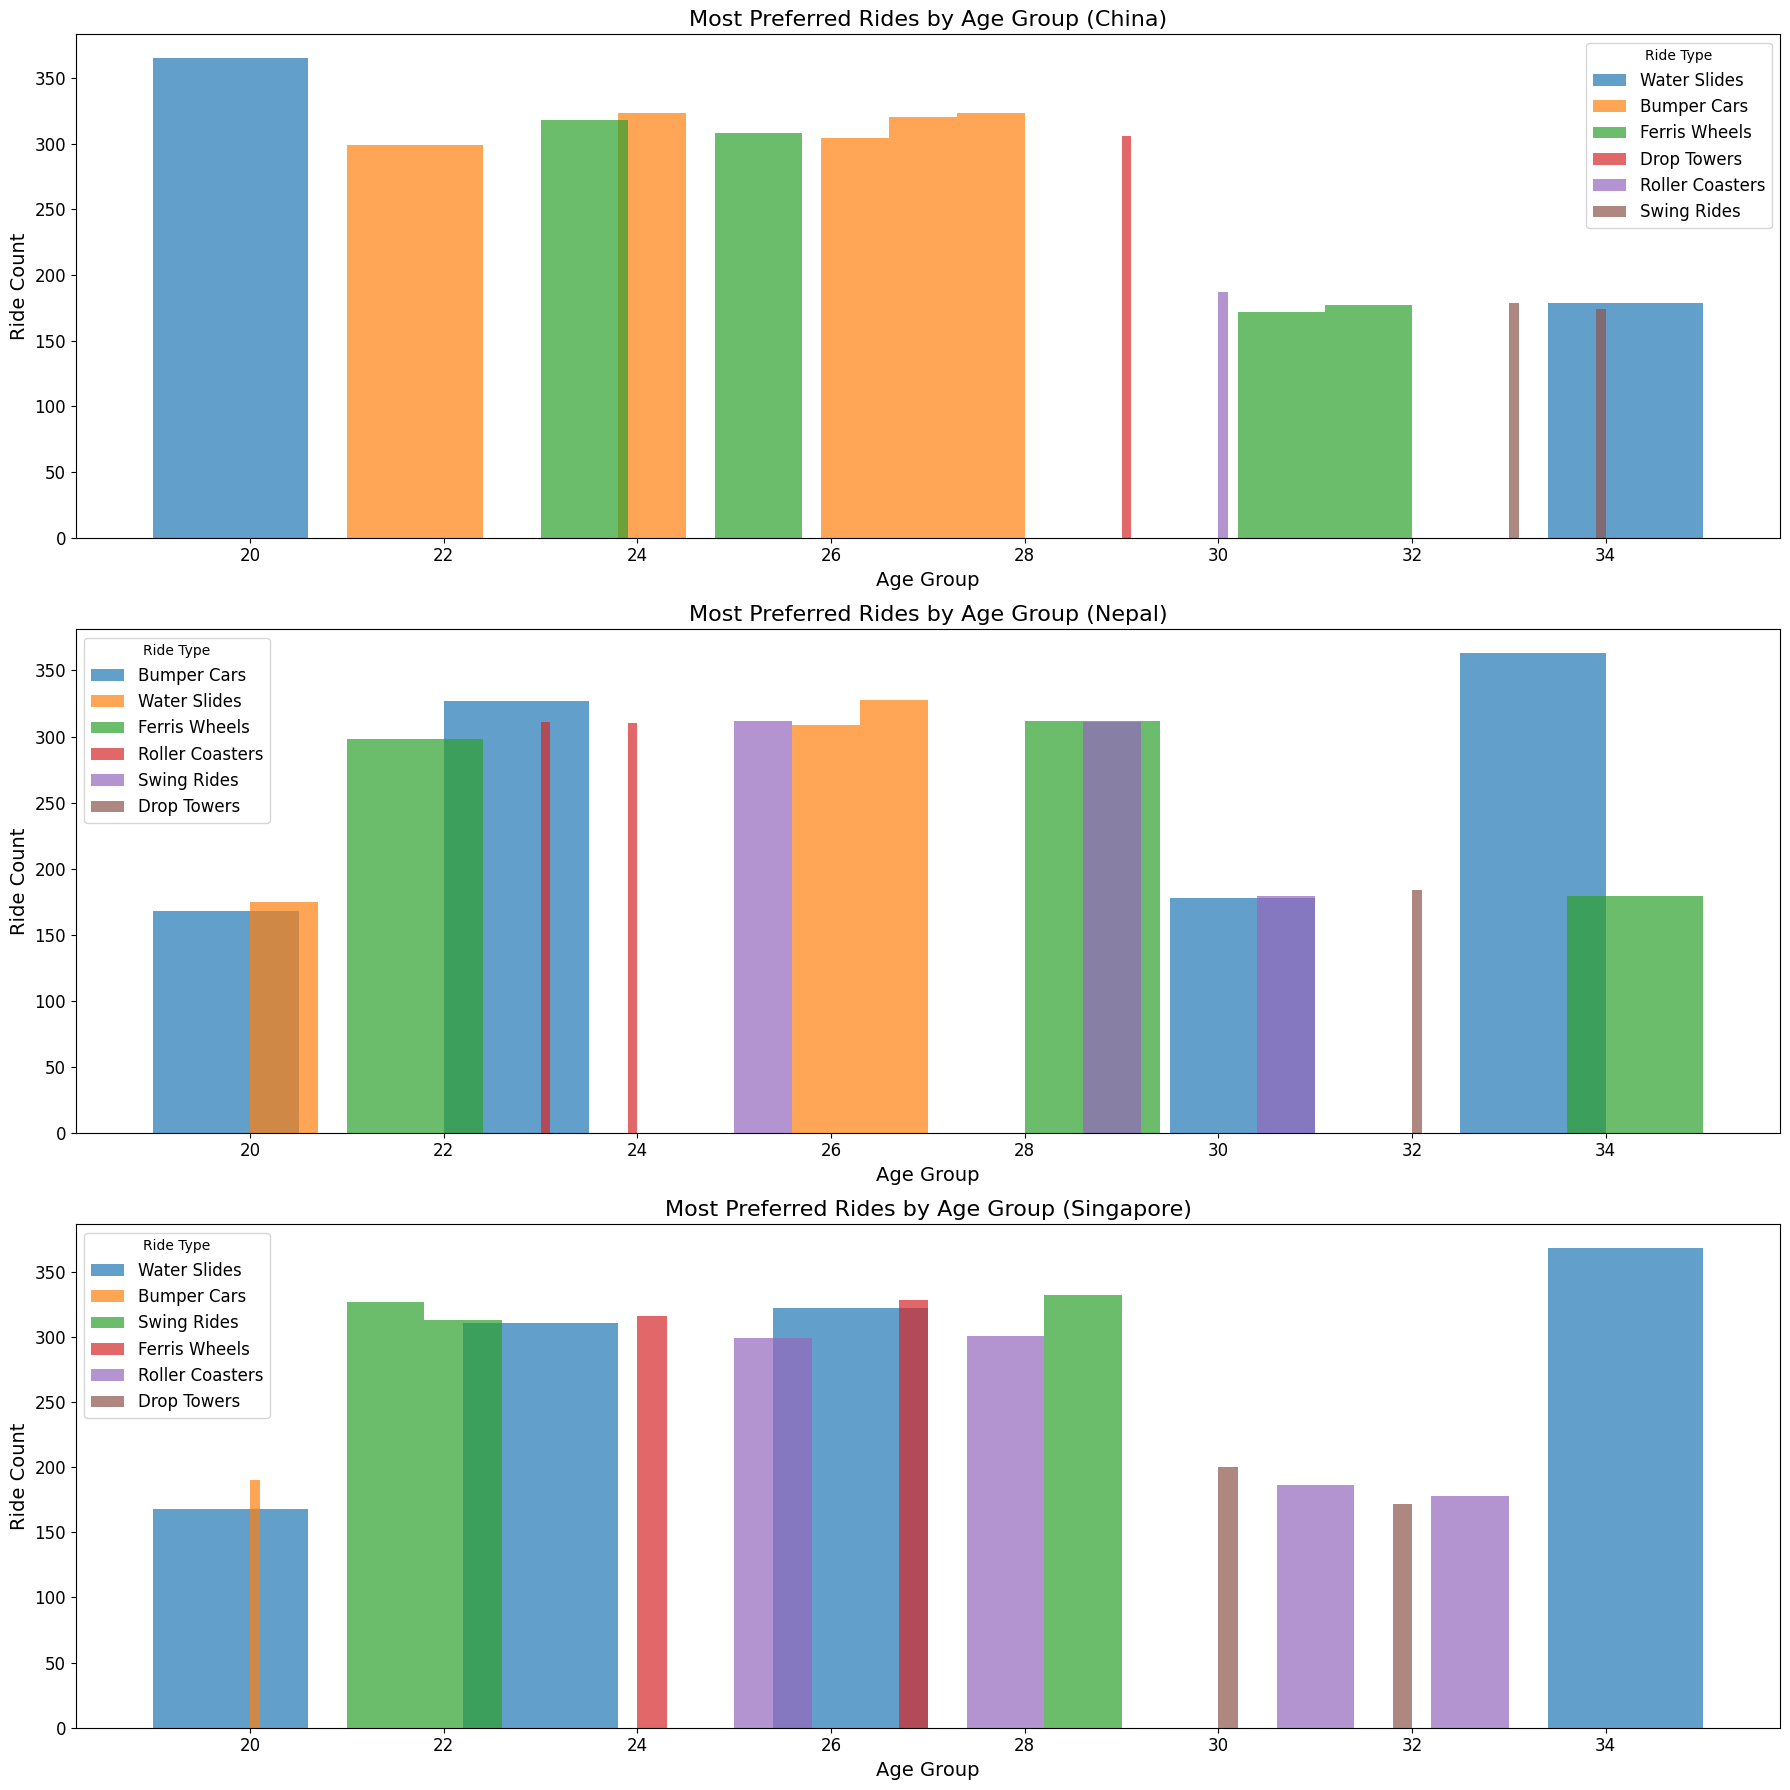

In [33]:
# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for age and type of ride preferred by location
ride_preference_summary = data.groupby(['Location', 'Age', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count')

# Calculate the most preferred rides for each age group by location
preferred_rides = (
    ride_preference_summary
    .sort_values(['Location', 'Age', 'Ride_Count'], ascending=[True, True, False])
    .groupby(['Location', 'Age'])
    .head(1)
    .reset_index(drop=True)
)

# Get unique locations for creating separate histograms
locations = preferred_rides['Location'].unique()

# Create separate histograms for each location
plt.figure(figsize=(18, 18))

for i, location in enumerate(locations, start=1):
    plt.subplot(len(locations), 1, i)
    location_data = preferred_rides[preferred_rides['Location'] == location]
    for ride_type in location_data['Type_of_Ride_Preferred'].unique():
        ride_data = location_data[location_data['Type_of_Ride_Preferred'] == ride_type]
        plt.hist(
            ride_data['Age'], 
            weights=ride_data['Ride_Count'], 
            bins=10, 
            alpha=0.7, 
            label=ride_type
        )
    plt.title(f'Most Preferred Rides by Age Group ({location})', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Ride Count', fontsize=14)
    plt.legend(title='Ride Type', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for type of ride preferred by location (all years)
ride_preference_summary = data.groupby(['Location', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count')

# Filter data for 2023
data_2023 = data[data['Year'] == 2023]
ride_preference_summary_2023 = data_2023.groupby(['Location', 'Type_of_Ride_Preferred']).size().reset_index(name='Ride_Count_2023')

# Calculate the most and least preferred rides for all years
most_preferred = (
    ride_preference_summary
    .sort_values(['Location', 'Ride_Count'], ascending=[True, False])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

least_preferred = (
    ride_preference_summary
    .sort_values(['Location', 'Ride_Count'], ascending=[True, True])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

# Combine results into a single table for all years
preference_summary_all_years = pd.merge(
    most_preferred, 
    least_preferred, 
    on='Location', 
    suffixes=('_Most_Preferred', '_Least_Preferred')
)

preference_summary_all_years.rename(columns={
    'Type_of_Ride_Preferred_Most_Preferred': 'Most Preferred Ride (All)',
    'Ride_Count_Most_Preferred': 'Most Preferred Count (All)',
    'Type_of_Ride_Preferred_Least_Preferred': 'Least Preferred Ride (All)',
    'Ride_Count_Least_Preferred': 'Least Preferred Count (All)'
}, inplace=True)

# Calculate the most and least preferred rides for 2023
most_preferred_2023 = (
    ride_preference_summary_2023
    .sort_values(['Location', 'Ride_Count_2023'], ascending=[True, False])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

least_preferred_2023 = (
    ride_preference_summary_2023
    .sort_values(['Location', 'Ride_Count_2023'], ascending=[True, True])
    .groupby('Location')
    .head(1)
    .reset_index(drop=True)
)

# Combine results into a single table for 2023
preference_summary_2023 = pd.merge(
    most_preferred_2023, 
    least_preferred_2023, 
    on='Location', 
    suffixes=('_Most_Preferred_2023', '_Least_Preferred_2023')
)

preference_summary_2023.rename(columns={
    'Type_of_Ride_Preferred_Most_Preferred_2023': 'Most Preferred Ride (2023)',
    'Ride_Count_2023_Most_Preferred_2023': 'Most Preferred Count (2023)',
    'Type_of_Ride_Preferred_Least_Preferred_2023': 'Least Preferred Ride (2023)',
    'Ride_Count_2023_Least_Preferred_2023': 'Least Preferred Count (2023)'
}, inplace=True)

# Display the tables separately
print("\nRide Preference Summary by Location (All Years):\n")
print(tabulate(preference_summary_all_years, headers='keys', tablefmt='grid', showindex=False))

print("\nRide Preference Summary by Location (2023):\n")
print(tabulate(preference_summary_2023, headers='keys', tablefmt='grid', showindex=False))

# Save the tables to CSV files


Ride Preference Summary by Location (All Years):

+------------+-----------------------------+------------------------------+------------------------------+-------------------------------+
| Location   | Most Preferred Ride (All)   |   Most Preferred Count (All) | Least Preferred Ride (All)   |   Least Preferred Count (All) |
+============+=============================+==============================+==============================+===============================+
| China      | Bumper Cars                 |                         3993 | Drop Towers                  |                          3841 |
+------------+-----------------------------+------------------------------+------------------------------+-------------------------------+
| Nepal      | Drop Towers                 |                         3941 | Bumper Cars                  |                          3889 |
+------------+-----------------------------+------------------------------+------------------------------+---------

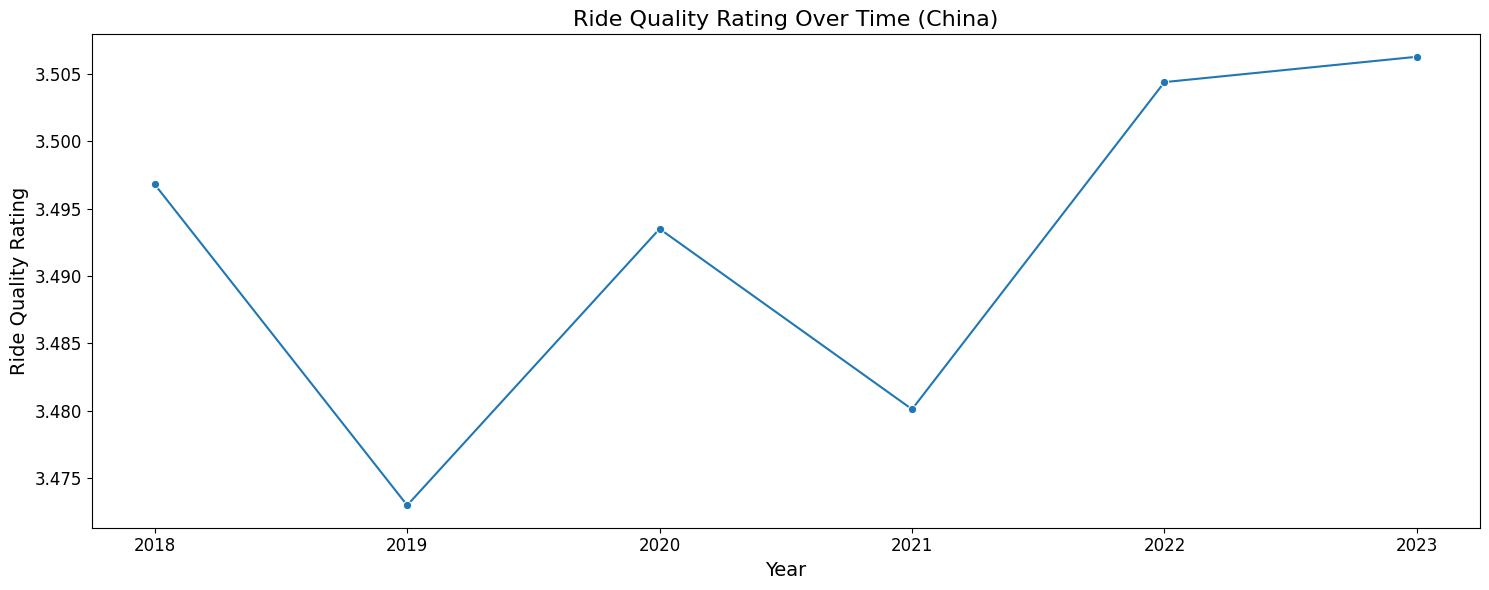

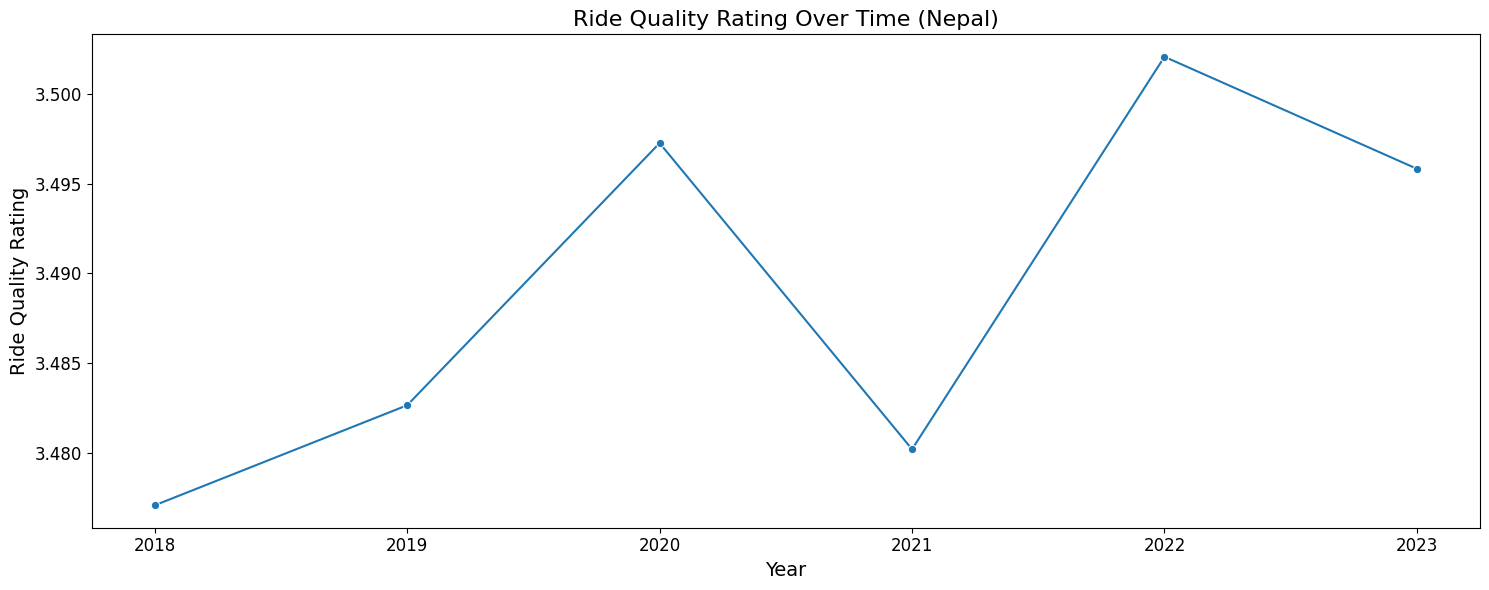

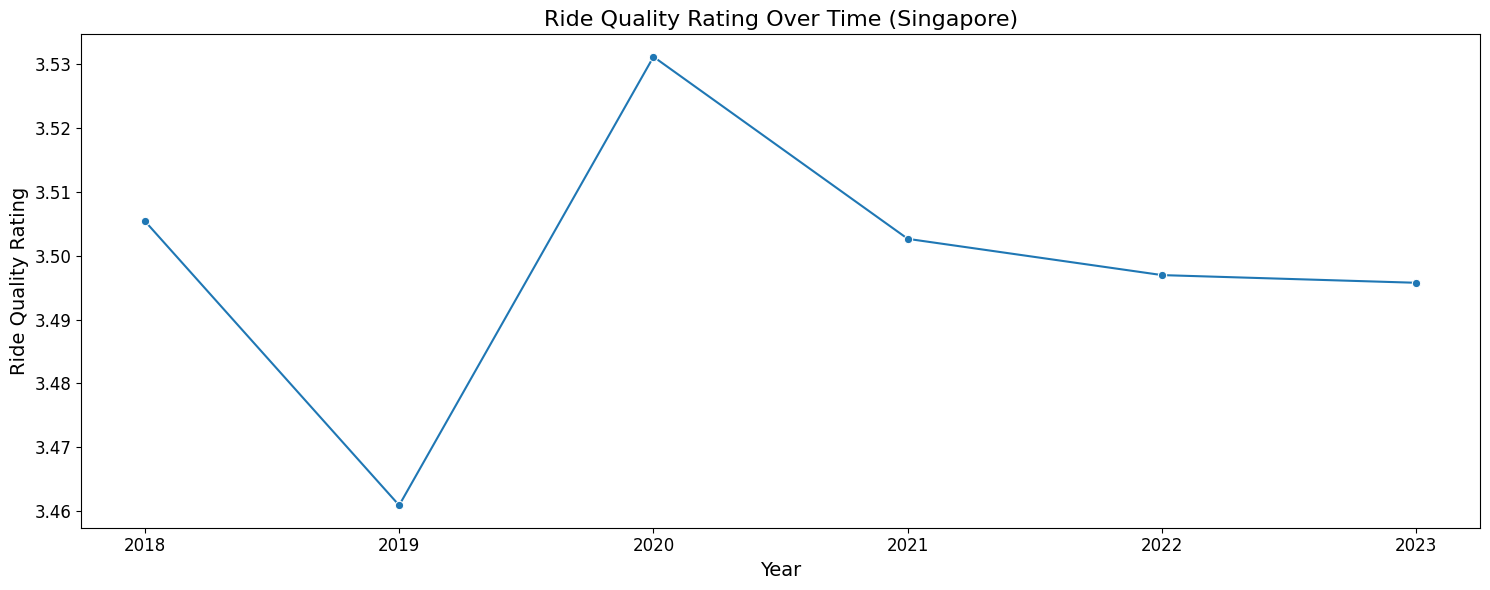

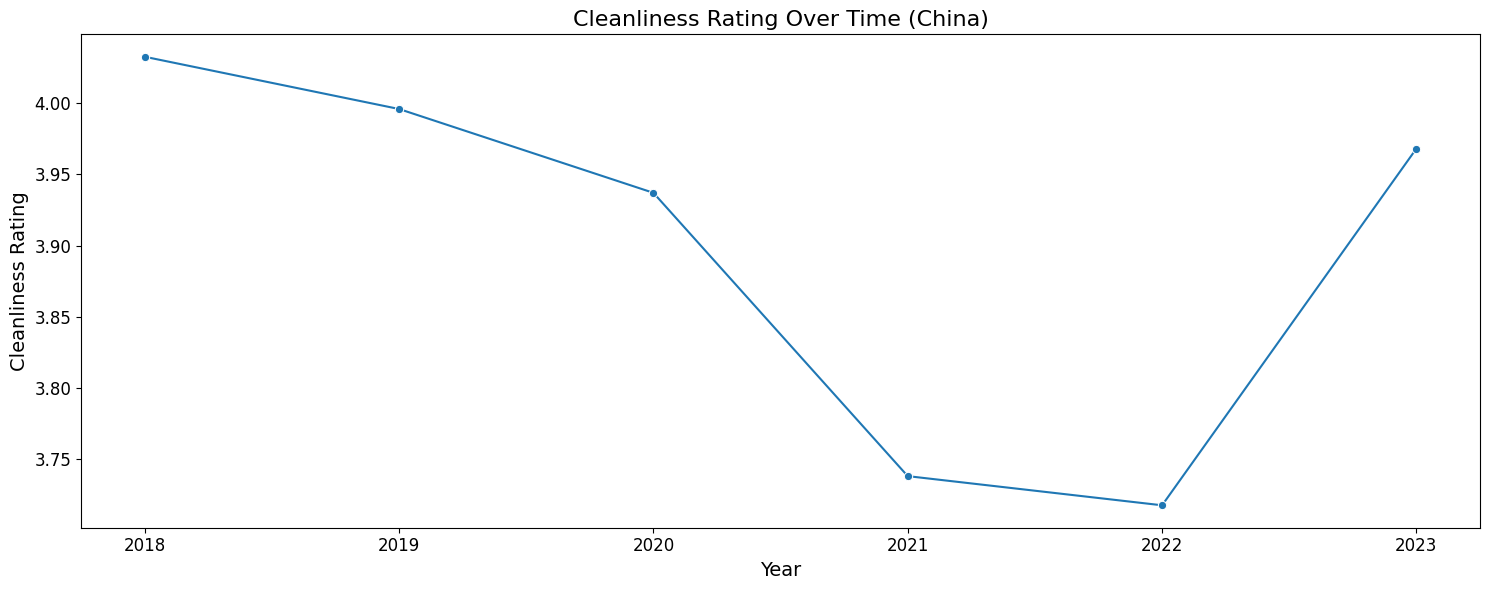

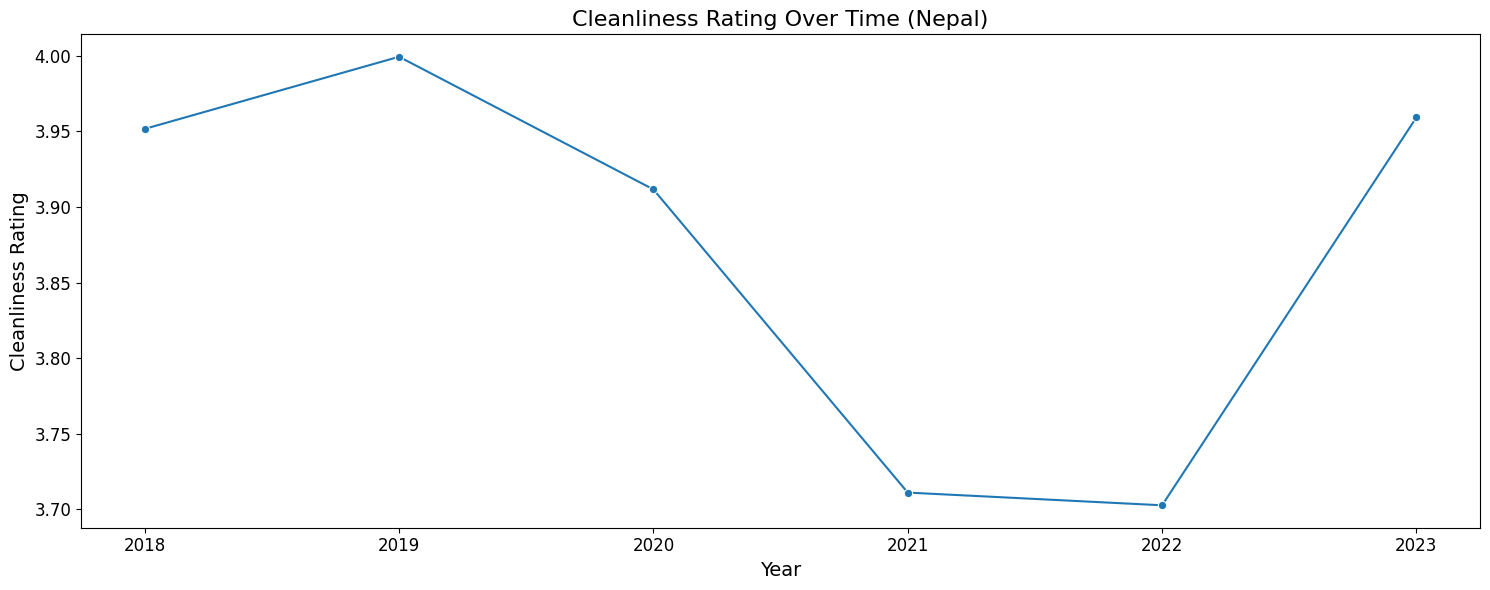

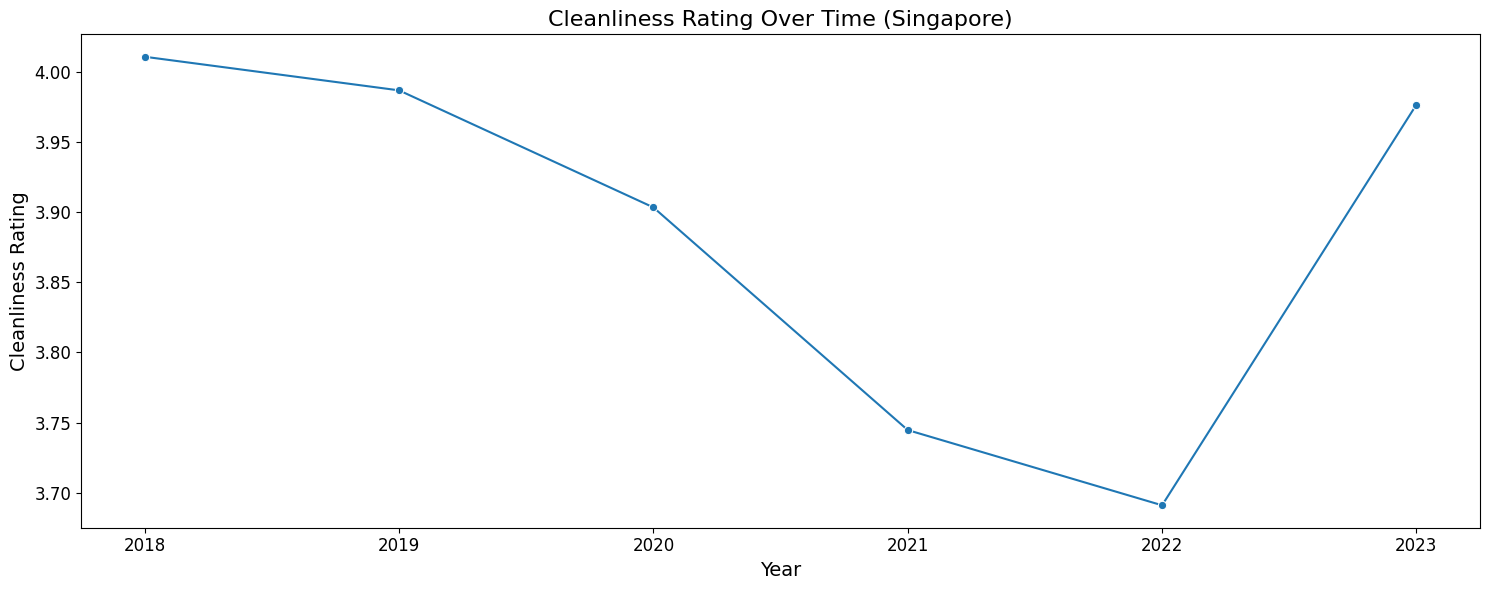

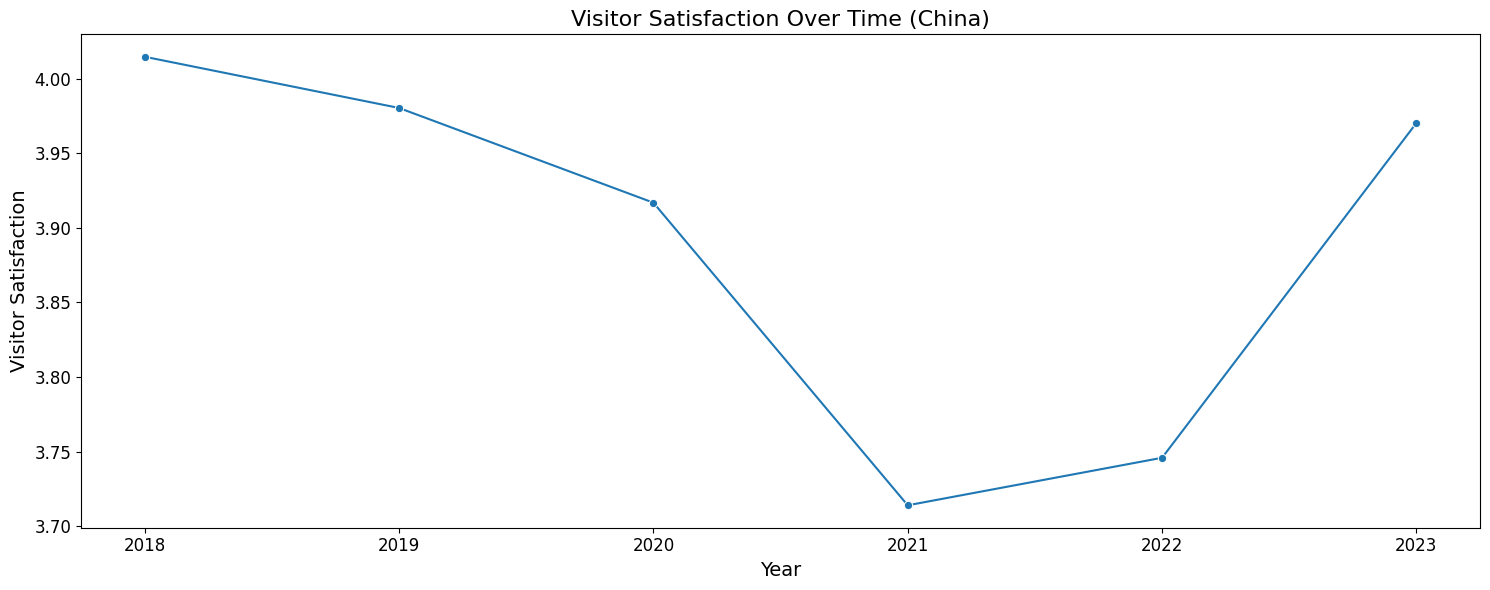

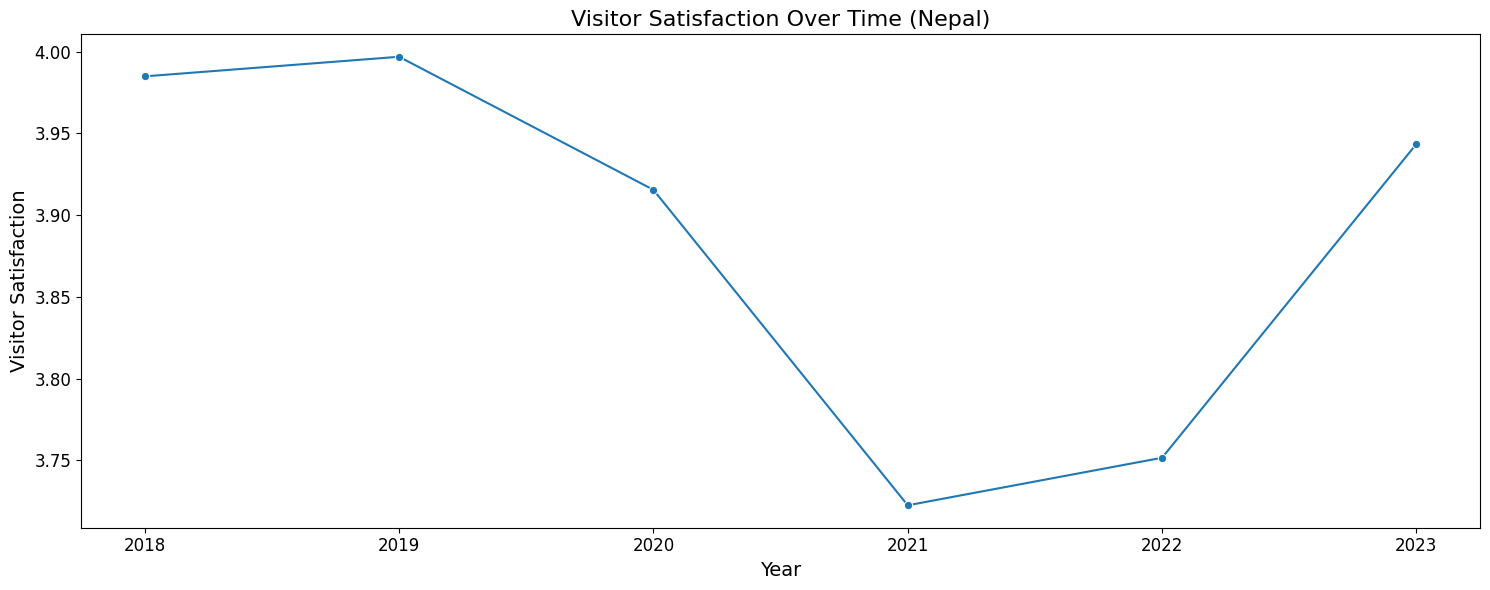

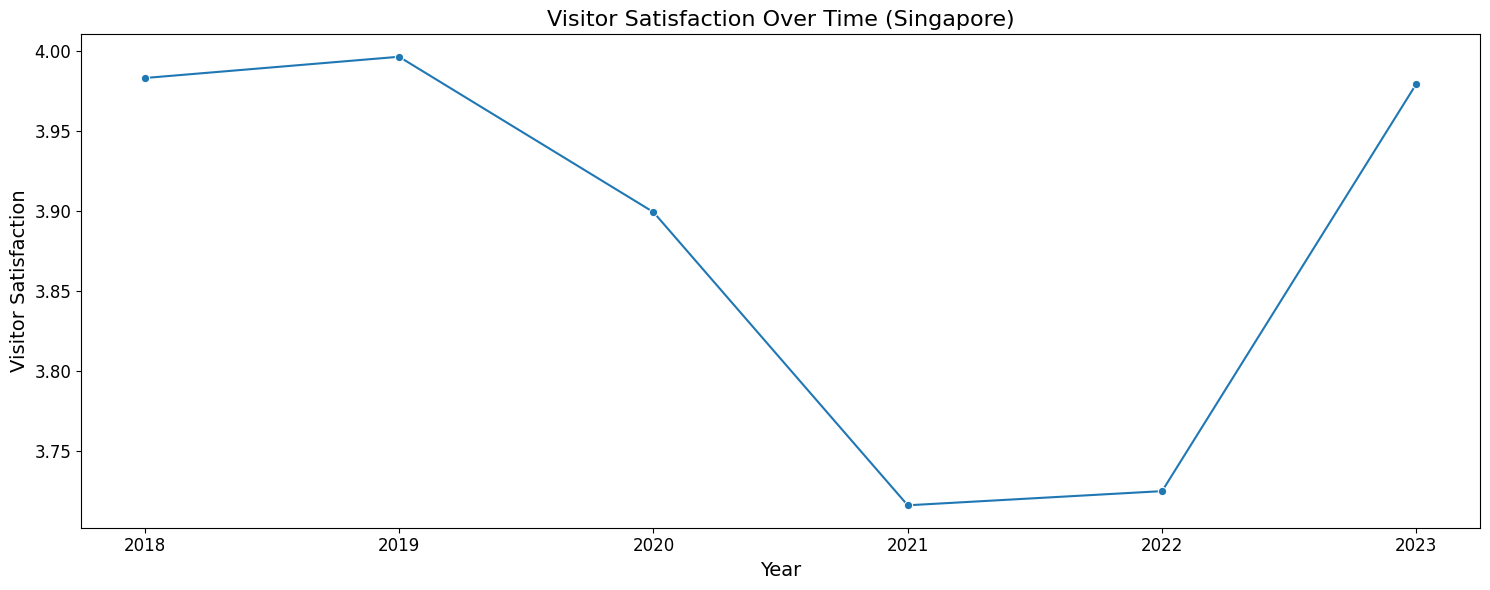

In [50]:

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for ride quality, cleanliness, and visitor satisfaction by year and location
quality_summary = data.groupby(['Location', 'Year'])['Ride_Quality_Rating'].mean().reset_index()
cleanliness_summary = data.groupby(['Location', 'Year'])['Cleanliness_Rating'].mean().reset_index()
satisfaction_summary = data.groupby(['Location', 'Year'])['Visitor_Satisfaction'].mean().reset_index()

# Get unique locations for creating separate visualizations
locations = data['Location'].unique()

# Ride Quality Rating by Time
for location in locations:
    plt.figure(figsize=(15, 6))
    location_data = quality_summary[quality_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Ride_Quality_Rating', 
        marker='o'
    )
    plt.title(f'Ride Quality Rating Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Ride Quality Rating', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Cleanliness Rating by Time
for location in locations:
    plt.figure(figsize=(15, 6))
    location_data = cleanliness_summary[cleanliness_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Cleanliness_Rating', 
        marker='o'
    )
    plt.title(f'Cleanliness Rating Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Cleanliness Rating', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Visitor Satisfaction by Time
for location in locations:
    plt.figure(figsize=(15, 6))
    location_data = satisfaction_summary[satisfaction_summary['Location'] == location]
    sns.lineplot(
        data=location_data, 
        x='Year', 
        y='Visitor_Satisfaction', 
        marker='o'
    )
    plt.title(f'Visitor Satisfaction Over Time ({location})', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Visitor Satisfaction', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [56]:
#highest rating and lowest rating for each location for all category
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Aggregate data for ride quality, cleanliness, and visitor satisfaction by year and location
quality_summary = data.groupby(['Location', 'Year'])['Ride_Quality_Rating'].mean().reset_index()
cleanliness_summary = data.groupby(['Location', 'Year'])['Cleanliness_Rating'].mean().reset_index()
satisfaction_summary = data.groupby(['Location', 'Year'])['Visitor_Satisfaction'].mean().reset_index()

# Combine the summaries into a single dataframe
overall_summary = pd.merge(quality_summary, cleanliness_summary, on=['Location', 'Year'])
overall_summary = pd.merge(overall_summary, satisfaction_summary, on=['Location', 'Year'])
overall_summary.rename(columns={
    'Ride_Quality_Rating': 'Average Ride Quality Rating',
    'Cleanliness_Rating': 'Average Cleanliness Rating',
    'Visitor_Satisfaction': 'Average Visitor Satisfaction'
}, inplace=True)

# Calculate highest and lowest for each metric by location and year
highest_summary = overall_summary.groupby(['Location']).max().reset_index()
highest_summary.rename(columns={
    'Year': 'Year of Highest Ratings',
    'Average Ride Quality Rating': 'Highest Ride Quality Rating',
    'Average Cleanliness Rating': 'Highest Cleanliness Rating',
    'Average Visitor Satisfaction': 'Highest Visitor Satisfaction'
}, inplace=True)

lowest_summary = overall_summary.groupby(['Location']).min().reset_index()
lowest_summary.rename(columns={
    'Year': 'Year of Lowest Ratings',
    'Average Ride Quality Rating': 'Lowest Ride Quality Rating',
    'Average Cleanliness Rating': 'Lowest Cleanliness Rating',
    'Average Visitor Satisfaction': 'Lowest Visitor Satisfaction'
}, inplace=True)

# Merge highest and lowest summaries for a complete table
final_summary = pd.merge(highest_summary, lowest_summary, on='Location', suffixes=('_Highest', '_Lowest'))

# Display the structured table (highest ratings)
highest_fields_summary = final_summary[[
    'Location', 
    'Year of Highest Ratings', 
    'Highest Ride Quality Rating', 
    'Highest Cleanliness Rating', 
    'Highest Visitor Satisfaction'
]]
print("\nStructured Summary of Highest Ratings:\n")
print(tabulate(highest_fields_summary, headers='keys', tablefmt='grid', showindex=False))

# Display the structured table (lowest ratings)
lowest_fields_summary = final_summary[[
    'Location', 
    'Year of Lowest Ratings', 
    'Lowest Ride Quality Rating', 
    'Lowest Cleanliness Rating', 
    'Lowest Visitor Satisfaction'
]]
print("\nStructured Summary of Lowest Ratings:\n")
print(tabulate(lowest_fields_summary, headers='keys', tablefmt='grid', showindex=False))



Structured Summary of Highest Ratings:

+------------+---------------------------+-------------------------------+------------------------------+--------------------------------+
| Location   |   Year of Highest Ratings |   Highest Ride Quality Rating |   Highest Cleanliness Rating |   Highest Visitor Satisfaction |
+============+===========================+===============================+==============================+================================+
| China      |                      2023 |                       3.50628 |                      4.03262 |                        4.01471 |
+------------+---------------------------+-------------------------------+------------------------------+--------------------------------+
| Nepal      |                      2023 |                       3.50205 |                      3.99938 |                        3.99691 |
+------------+---------------------------+-------------------------------+------------------------------+--------------------

/tmp/ipykernel_572744/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_572744/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


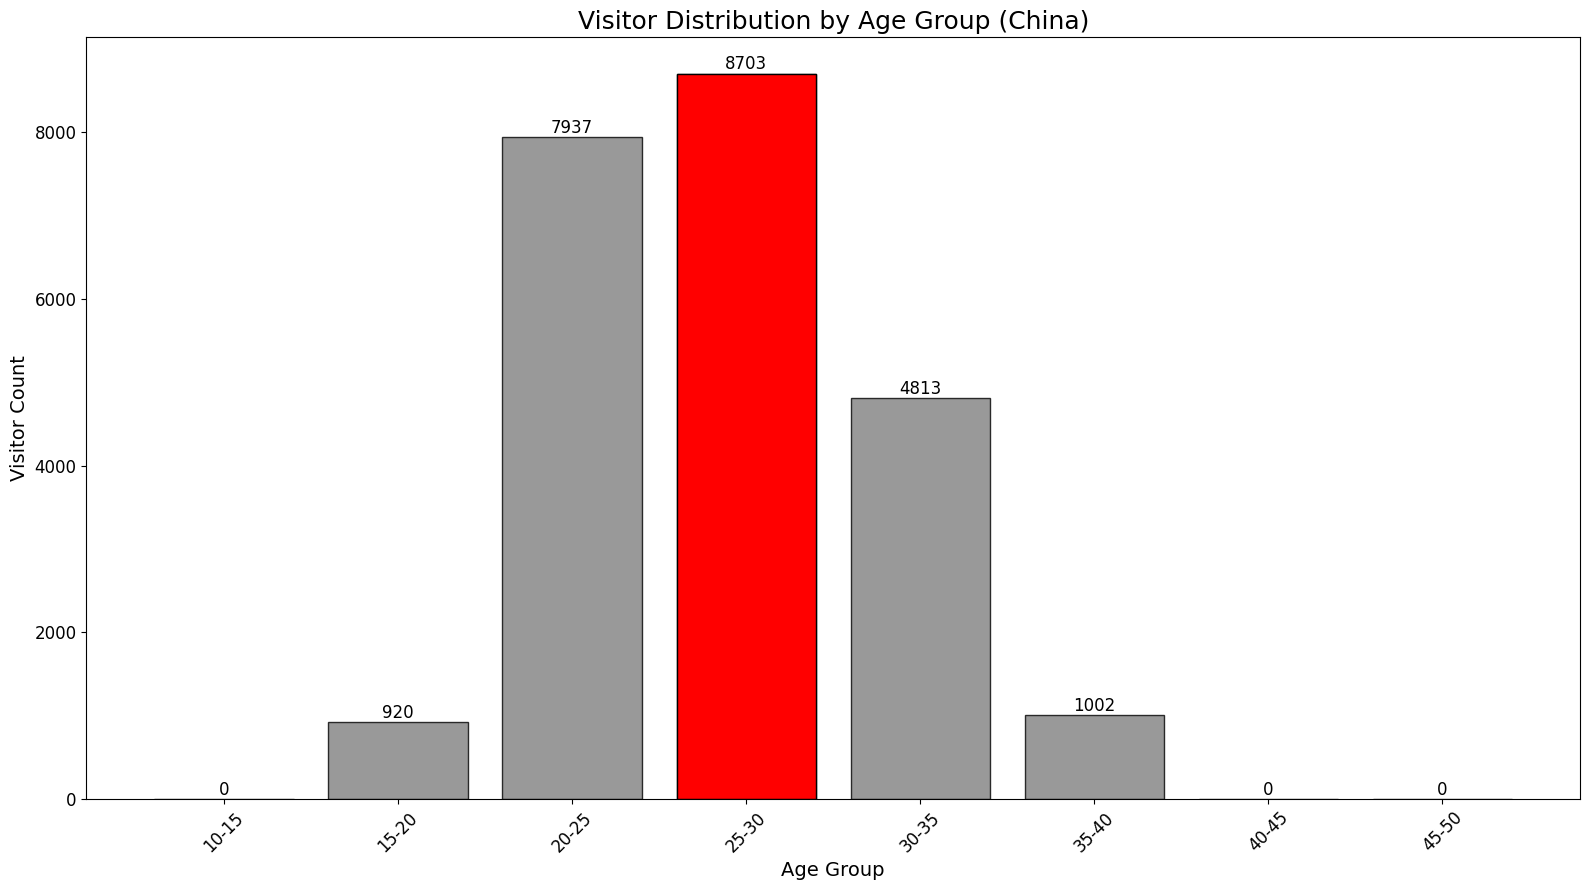

/tmp/ipykernel_572744/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_572744/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


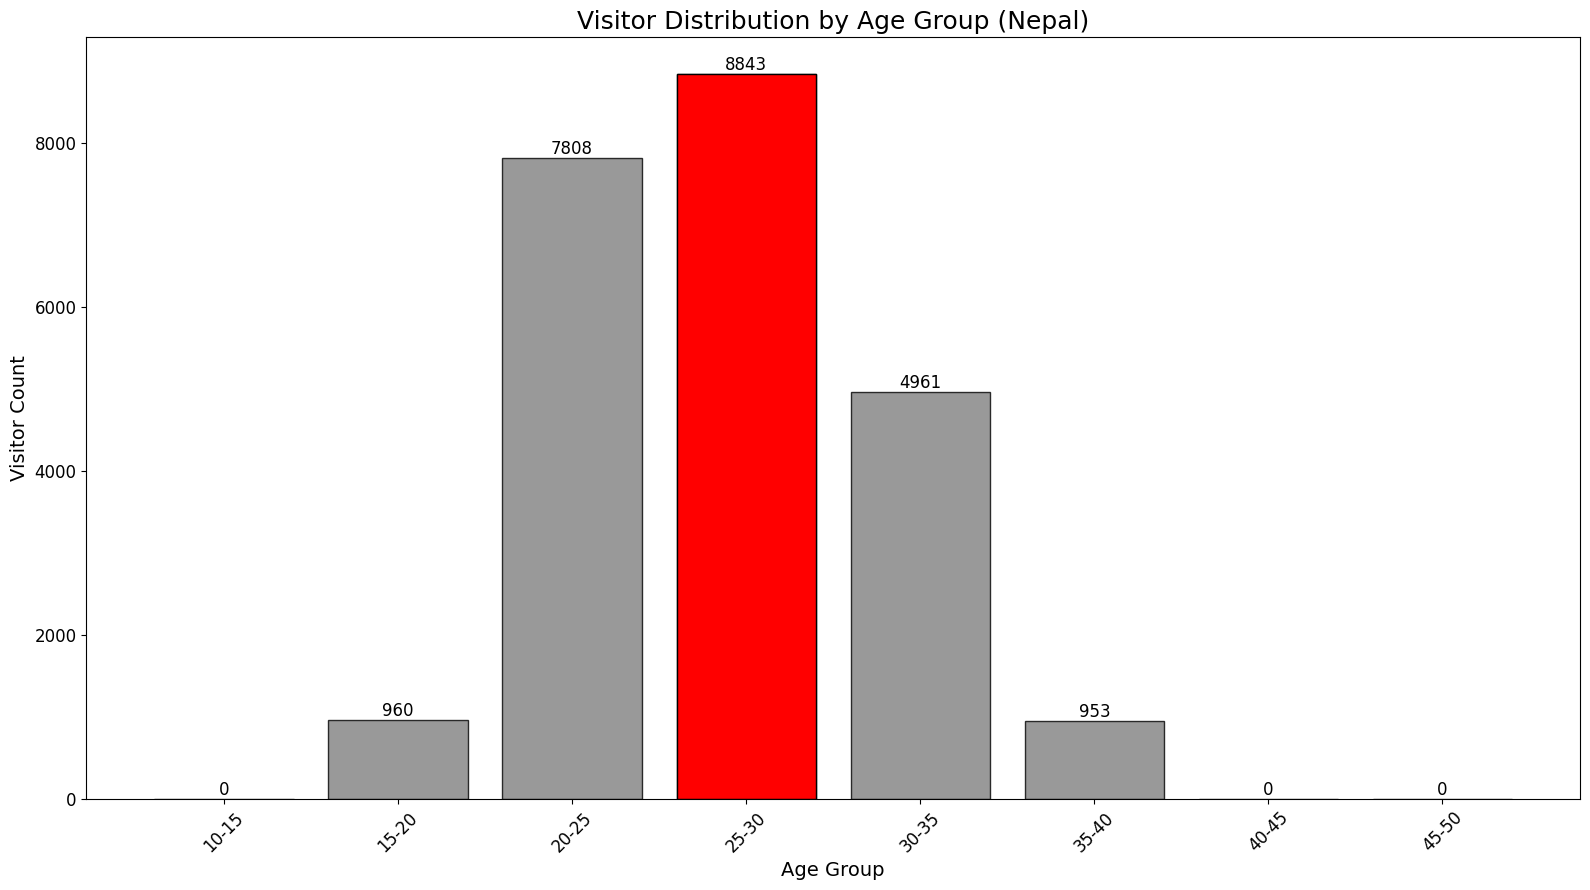

/tmp/ipykernel_572744/230834888.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_572744/230834888.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()


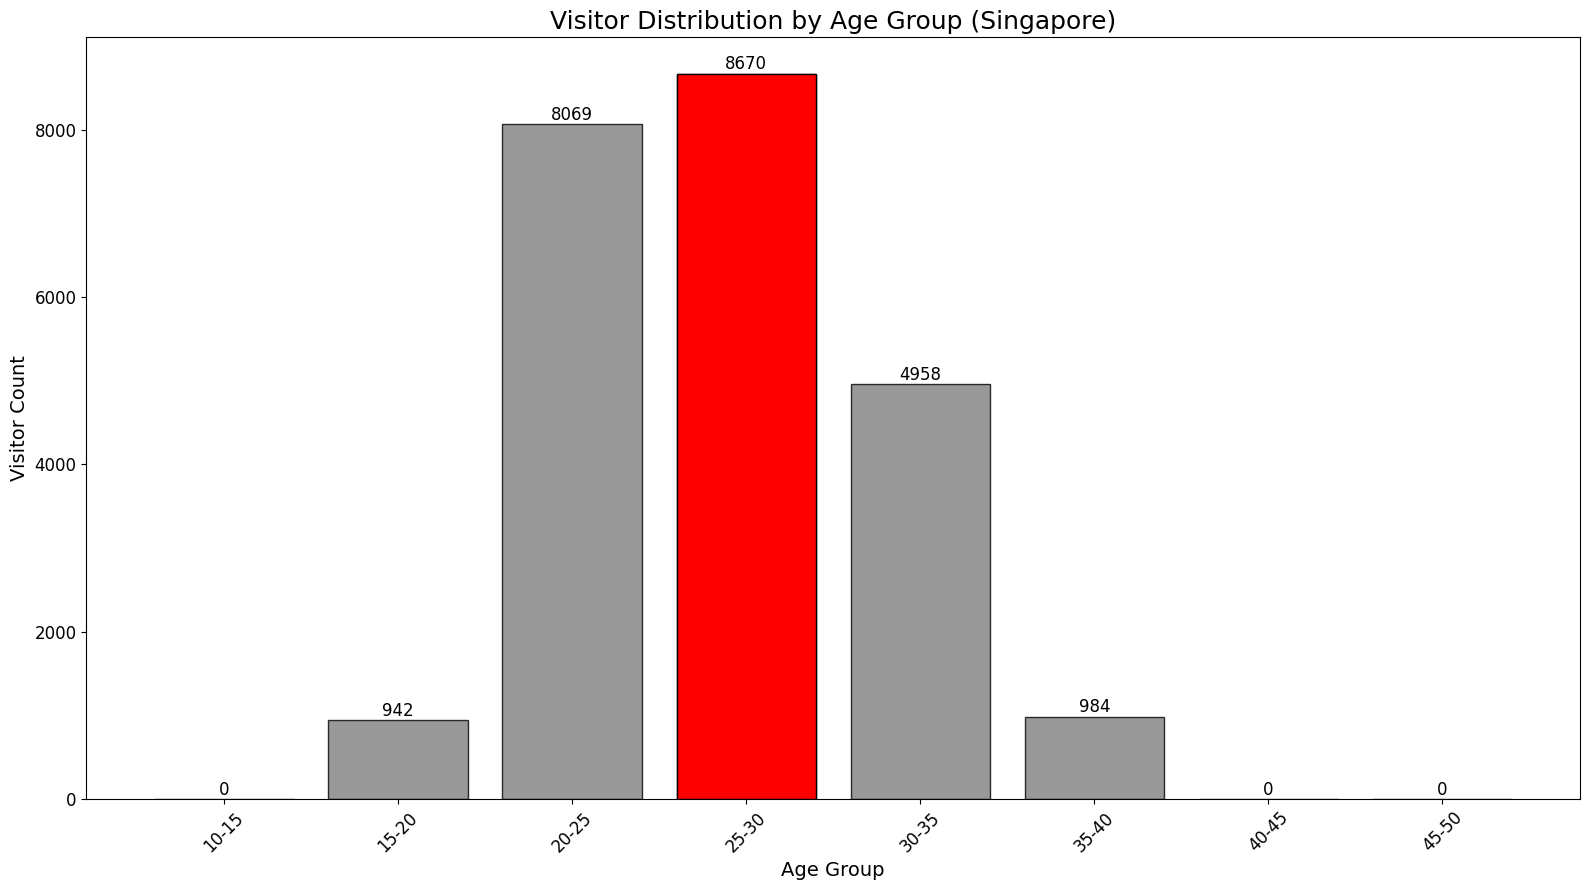

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Visualization to see which age group visits each location the most
age_location_summary = data.groupby(['Location', 'Age']).size().reset_index(name='Visitor_Count')
locations = age_location_summary['Location'].unique()


# Visualization to see which age group visits each location the most
age_location_summary = data.groupby(['Location', 'Age']).size().reset_index(name='Visitor_Count')
locations = age_location_summary['Location'].unique()

for location in locations:
    plt.figure(figsize=(16, 9))
    location_data = age_location_summary[age_location_summary['Location'] == location]
    
    # Group age into bins and calculate visitor counts for each range
    bins = [10, 15, 20, 25, 30, 35, 40, 45, 50]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
    location_data['Age_Group'] = pd.cut(location_data['Age'], bins=bins, labels=labels, right=False)
    grouped_data = location_data.groupby('Age_Group')['Visitor_Count'].sum().reset_index()

    # Plot histogram with annotations
    plt.bar(grouped_data['Age_Group'], grouped_data['Visitor_Count'], color='grey', edgecolor='black', alpha=0.8)
    plt.title(f'Visitor Distribution by Age Group ({location})', fontsize=18)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Visitor Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate bars with exact counts
    for i, value in enumerate(grouped_data['Visitor_Count']):
        plt.text(i, value + 50, str(value), ha='center', fontsize=12)

    # Highlight the bin with the highest visitor count
    max_index = grouped_data['Visitor_Count'].idxmax()
    plt.bar(grouped_data['Age_Group'][max_index], grouped_data['Visitor_Count'][max_index], color='red', edgecolor='black')

    plt.tight_layout()
    plt.show()





/tmp/ipykernel_572744/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


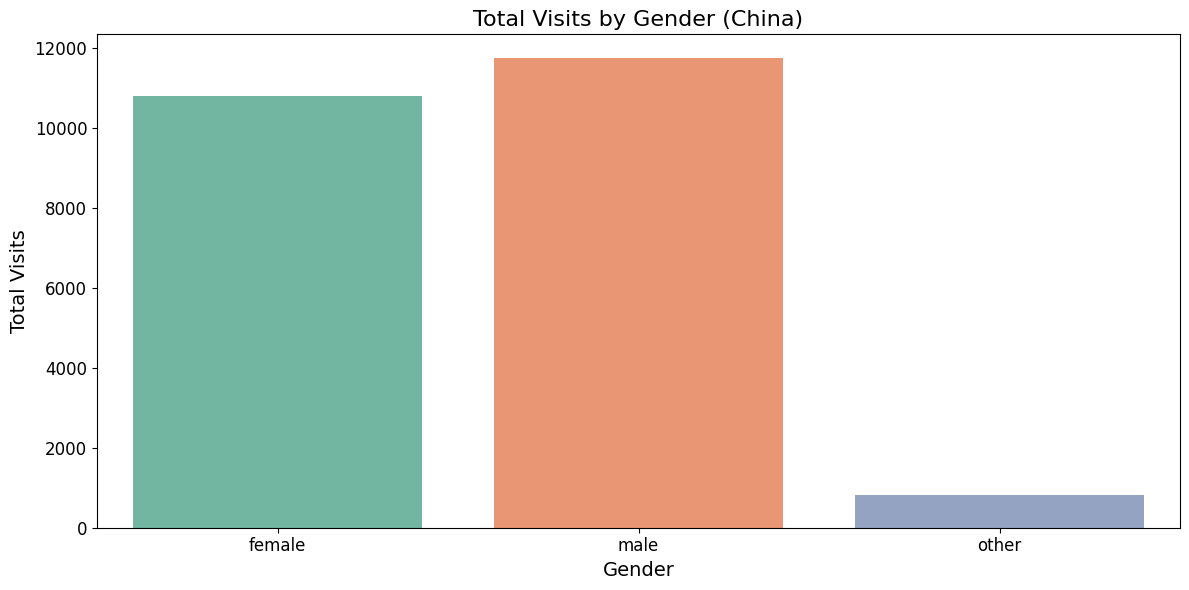

/tmp/ipykernel_572744/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


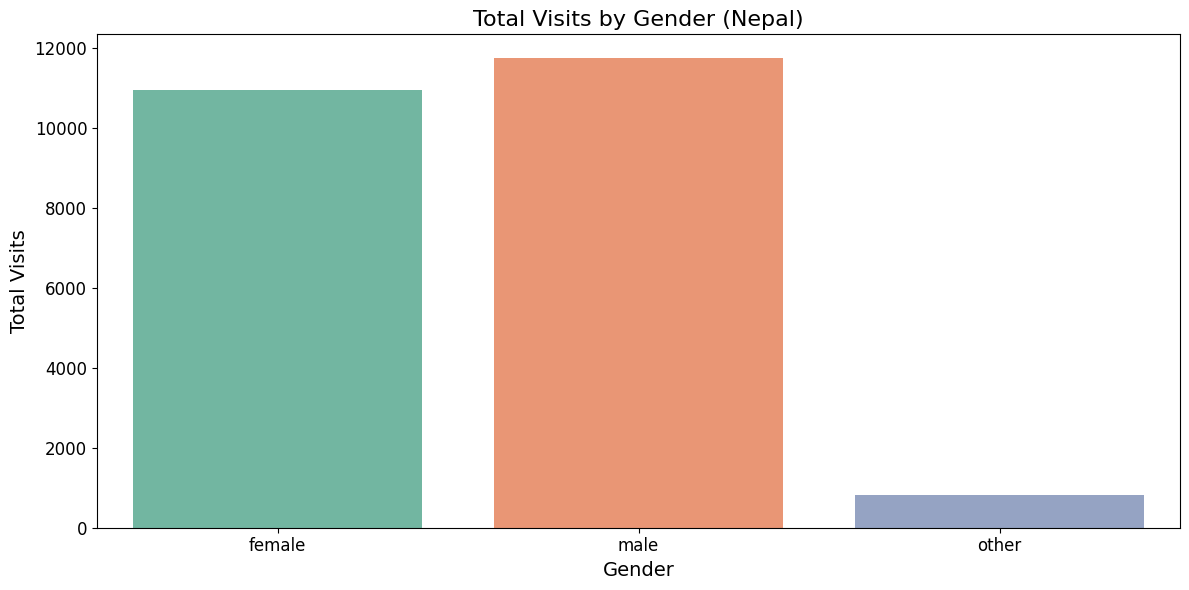

/tmp/ipykernel_572744/1088200575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')


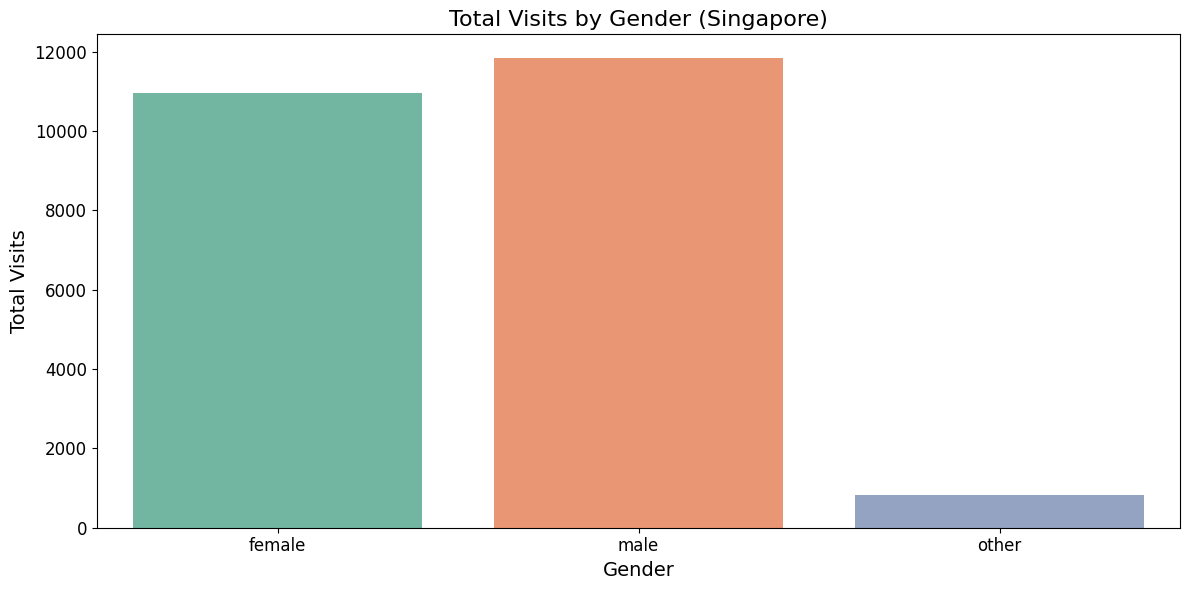

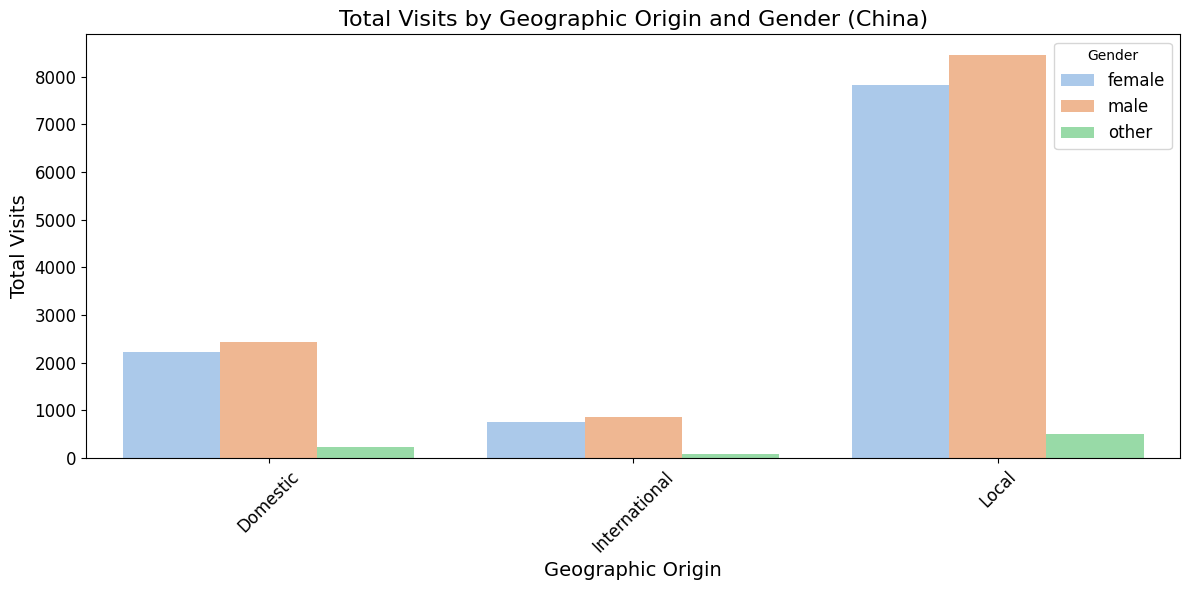

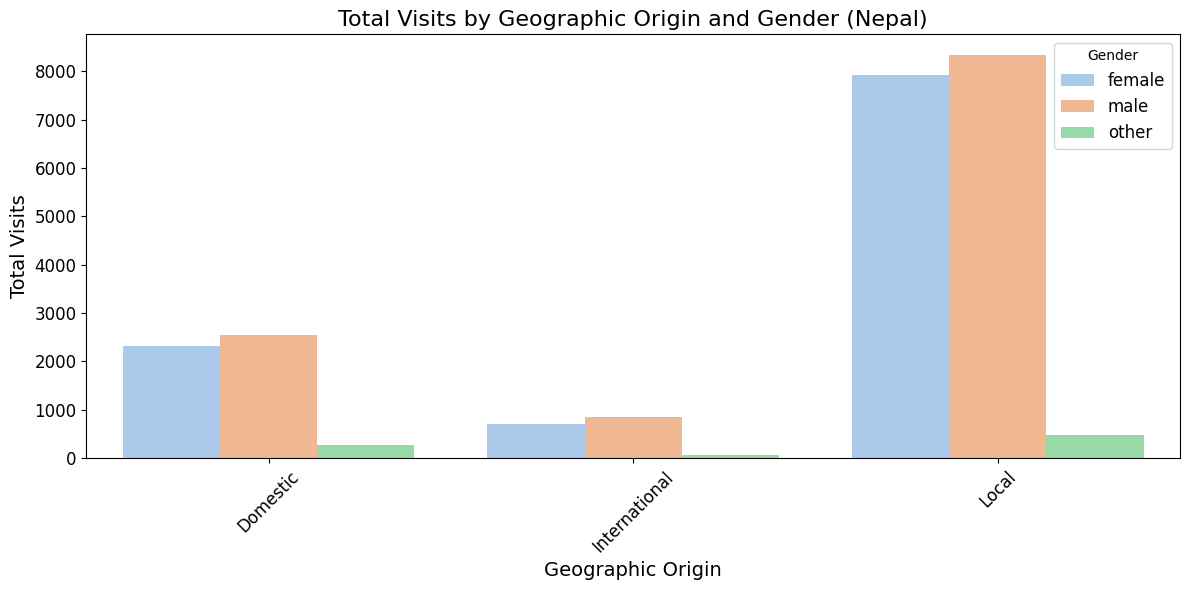

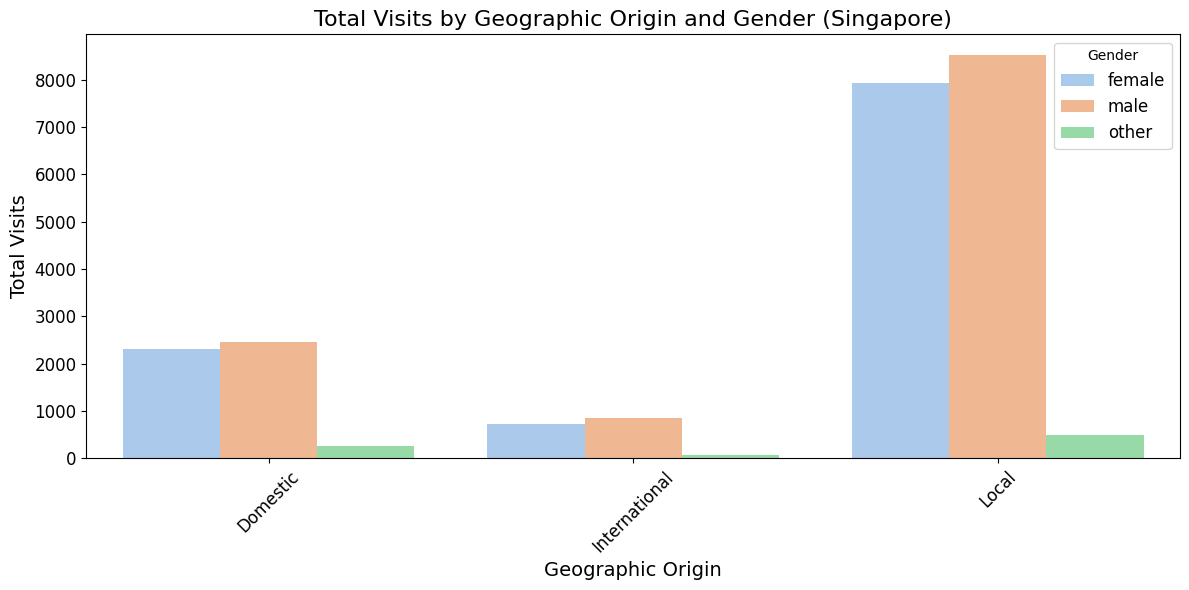

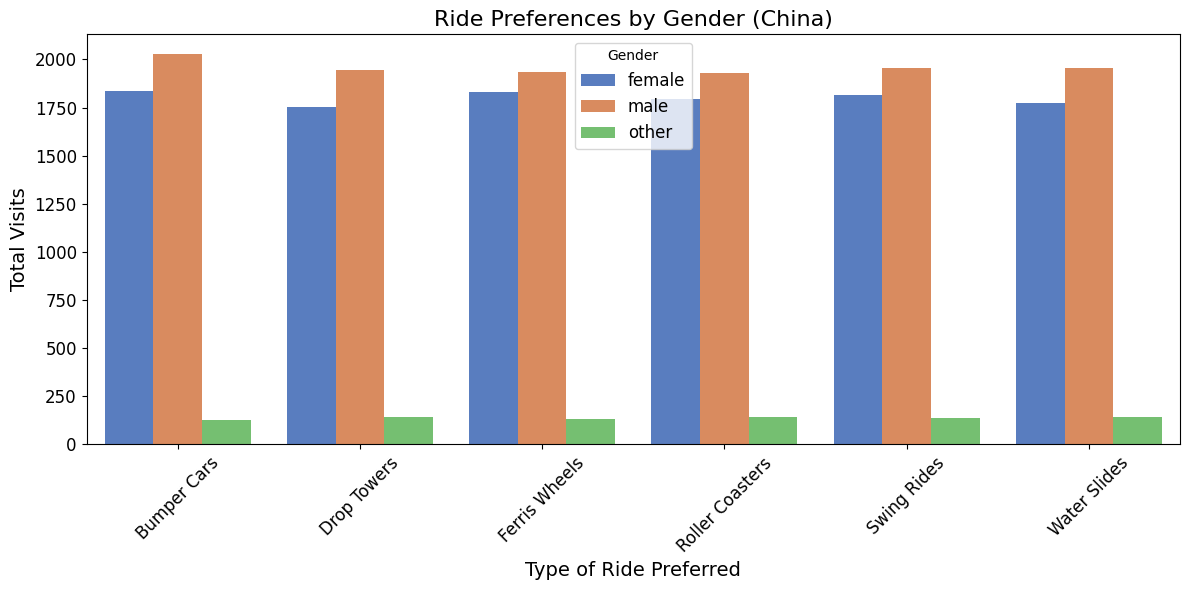

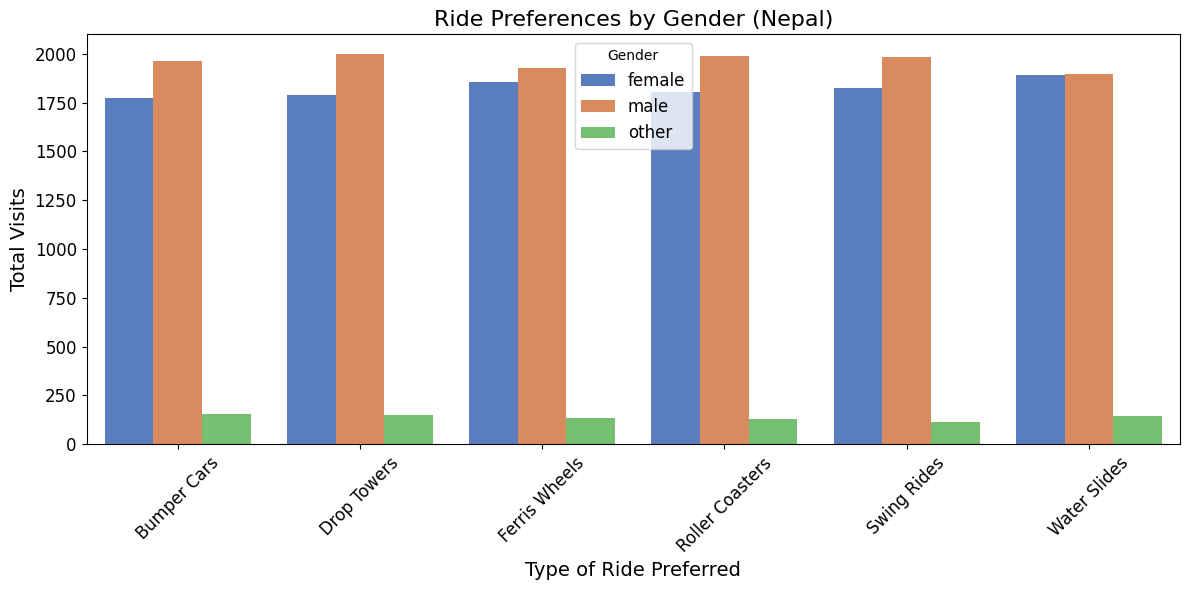

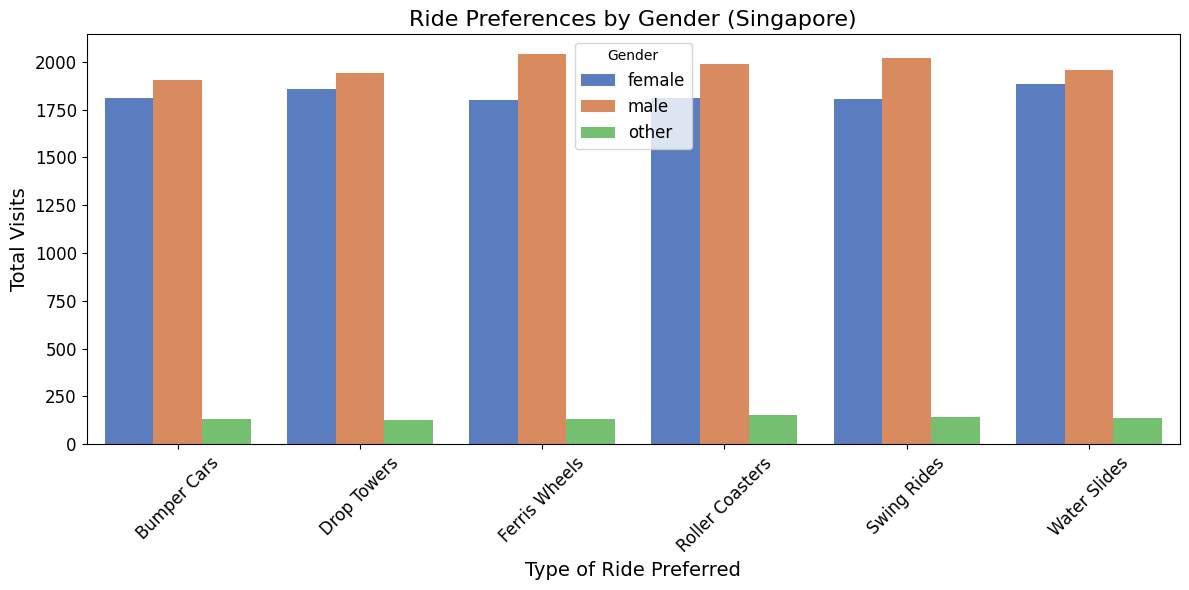

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Convert necessary columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year
data['Gender'] = data['Gender'].str.lower()
# Visualization 1: Total visits by gender for each location
locations = data['Location'].unique()
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    gender_summary = location_data.groupby('Gender').size().reset_index(name='Total_Visits')
    sns.barplot(data=gender_summary, x='Gender', y='Total_Visits', palette='Set2')
    plt.title(f'Total Visits by Gender ({location})', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization 2: Total visits by geographic origin, location, and gender
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    geo_gender_summary = location_data.groupby(['Geographic_Origin', 'Gender']).size().reset_index(name='Total_Visits')
    sns.barplot(data=geo_gender_summary, x='Geographic_Origin', y='Total_Visits', hue='Gender', palette='pastel')
    plt.title(f'Total Visits by Geographic Origin and Gender ({location})', fontsize=16)
    plt.xlabel('Geographic Origin', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization 3: Ride preferences by gender for each location
for location in locations:
    plt.figure(figsize=(12, 6))
    location_data = data[data['Location'] == location]
    ride_gender_summary = location_data.groupby(['Type_of_Ride_Preferred', 'Gender']).size().reset_index(name='Total_Visits')
    sns.barplot(data=ride_gender_summary, x='Type_of_Ride_Preferred', y='Total_Visits', hue='Gender', palette='muted')
    plt.title(f'Ride Preferences by Gender ({location})', fontsize=16)
    plt.xlabel('Type of Ride Preferred', fontsize=14)
    plt.ylabel('Total Visits', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.tight_layout()
    plt.show()


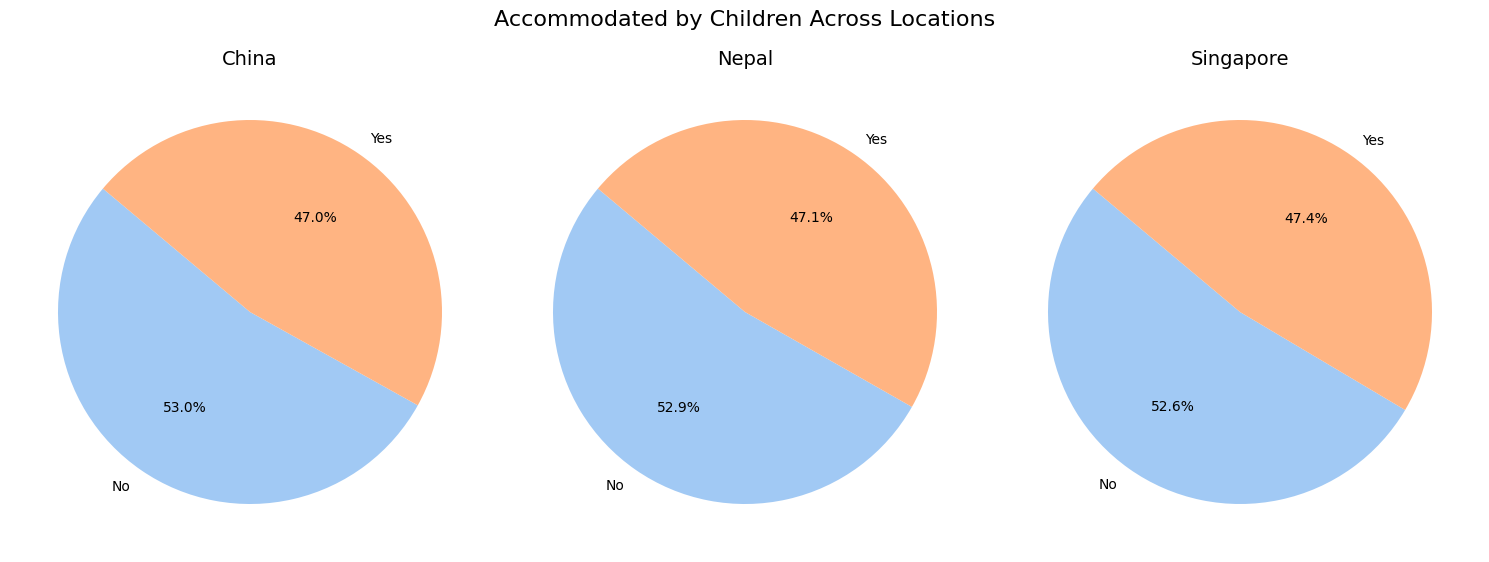

In [83]:


# Visualization: Accommodated by children for each location using pie charts in the same figure
num_locations = len(data['Location'].unique())
plt.figure(figsize=(5 * num_locations, 6))

locations = data['Location'].unique()
for i, location in enumerate(locations, start=1):
    plt.subplot(1, num_locations, i)
    location_data = data[data['Location'] == location]
    child_accommodation_summary = location_data['Accompanied_by_Children'].value_counts().reset_index()
    child_accommodation_summary.columns = ['Accompanied_by_Children', 'Count']
    plt.pie(
        child_accommodation_summary['Count'], 
        labels=child_accommodation_summary['Accompanied_by_Children'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': 10}
    )
    plt.title(f'{location}', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Accommodated by Children Across Locations', fontsize=16)
plt.show()
